# DATA PROCESSING

# Импорт необходимых модумей

In [1]:
import re
import os
import logging
import xlsxwriter
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.relativedelta import relativedelta


# Загрузка данных

In [2]:
# Избавляемся от не нужных предупреждений
warnings.filterwarnings('ignore')

# Настройка логирования для отслеживания выполнения кода
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Устанавливание рабочей директории
os.chdir("source") 

# Отображать все столбцы
pd.set_option('display.max_columns', None)

# Отображать все строки
pd.set_option('display.max_rows', None)


In [3]:
# # Загрузка данных из Excel
# data_loan = pd.read_excel("full_data.xlsx", sheet_name='ListPI1.csv')
# data_app = pd.read_excel("full_data.xlsx", sheet_name='ListP1.csv')
# data_beh = pd.read_excel("full_data.xlsx", sheet_name='ListB1.csv')

In [4]:
# Загрузка данных из CSV файлов
data_app = pd.read_csv('ListPI1.csv')
data_loan = pd.read_csv('ListP1.csv')
data_beh = pd.read_csv('ListB1.csv')


# Объединение данных по Account ID

In [5]:
logging.info("Объединение данных по 'Account ID'.")
res = data_loan.merge(data_app, on="Account ID", how="left", suffixes=('_loan', '_app'))
res = res.merge(data_beh, on="Account ID", how="left", suffixes=('', '_beh'))


2024-12-08 09:06:50,772 - INFO - Объединение данных по 'Account ID'.


# Преобразование названий столбцов в snake_case

In [6]:
logging.info("Просмотр название столбцов до преобразования")
for i, column in enumerate(res.columns.to_list()):
    print(f"{i} <=> {column}")

2024-12-08 09:06:51,157 - INFO - Просмотр название столбцов до преобразования


0 <=> Customer ID_loan
1 <=> Application ID_loan
2 <=> Account ID
3 <=> Branch ID
4 <=> Product ID
5 <=> Application date
6 <=> Date loan granted
7 <=> Loan Amount
8 <=> First instalment due date
9 <=> Interest rate
10 <=> Collateral type
11 <=> Value of collateral
12 <=> Property type/Collateral type
13 <=> Salary payment in bank account
14 <=> Loan type
15 <=> # of instalments
16 <=> Instalment amount/Min instalment amount
17 <=> Customer ID_app
18 <=> Application ID_app
19 <=> Date of birth
20 <=> Gender
21 <=> City of Living
22 <=> Region of living
23 <=> City of registration
24 <=> Region of registration
25 <=> Work phone number
26 <=> Mobile phone number
27 <=> Education
28 <=> Marital status
29 <=> # Dependants
30 <=> # Children
31 <=> # months at current address
32 <=> Employment type
33 <=> Employment sector
34 <=> Employment segment
35 <=> # months at job
36 <=> Net main income
37 <=> Source of main income
38 <=> Additional income
39 <=> Source of additional income
40 <=> Rep

In [7]:
# Функция для преобразования названий столбцов в snake_case
def to_snake_case(column_name):
    return column_name.lower().replace('.', '_').replace('#', 'number').replace(' ', '_')

logging.info("Преобразование названий столбцов в snake_case.")

res.columns = [to_snake_case(col) for col in res.columns]


2024-12-08 09:06:51,165 - INFO - Преобразование названий столбцов в snake_case.


In [8]:
logging.info("Просмотр название столбцов после преобразования")
for i, column in enumerate(res.columns.to_list()):
    print(f"{i} <=> {column}")

2024-12-08 09:06:51,169 - INFO - Просмотр название столбцов после преобразования


0 <=> customer_id_loan
1 <=> application_id_loan
2 <=> account_id
3 <=> branch_id
4 <=> product_id
5 <=> application_date
6 <=> date_loan_granted
7 <=> loan_amount
8 <=> first_instalment_due_date
9 <=> interest_rate
10 <=> collateral_type
11 <=> value_of_collateral
12 <=> property_type/collateral_type
13 <=> salary_payment_in_bank_account
14 <=> loan_type
15 <=> number_of_instalments
16 <=> instalment_amount/min_instalment_amount
17 <=> customer_id_app
18 <=> application_id_app
19 <=> date_of_birth
20 <=> gender
21 <=> city_of_living
22 <=> region_of_living
23 <=> city_of_registration
24 <=> region_of_registration
25 <=> work_phone_number
26 <=> mobile_phone_number
27 <=> education
28 <=> marital_status
29 <=> number_dependants
30 <=> number_children
31 <=> number_months_at_current_address
32 <=> employment_type
33 <=> employment_sector
34 <=> employment_segment
35 <=> number_months_at_job
36 <=> net_main_income
37 <=> source_of_main_income
38 <=> additional_income
39 <=> source_of_add

# Удаление дублириющих переменных

In [9]:
res = res.drop(['application_id_app', 'customer_id_app', 'customer_id'], axis=1)
res = res.rename(columns={
    'customer_id_loan': 'customer_id',
    'application_id_loan': 'application_id'
})


# Переименование столбцов с русскими именами на английские

In [10]:
logging.info("Просмотр название столбцов после переименования")
res.head(2)

2024-12-08 09:06:51,492 - INFO - Просмотр название столбцов после переименования


,customer_id,application_id,account_id,branch_id,product_id,application_date,date_loan_granted,loan_amount,first_instalment_due_date,interest_rate,collateral_type,value_of_collateral,property_type/collateral_type,salary_payment_in_bank_account,loan_type,number_of_instalments,instalment_amount/min_instalment_amount,date_of_birth,gender,city_of_living,region_of_living,city_of_registration,region_of_registration,work_phone_number,mobile_phone_number,education,marital_status,number_dependants,number_children,number_months_at_current_address,employment_type,employment_sector,employment_segment,number_months_at_job,net_main_income,source_of_main_income,additional_income,source_of_additional_income,reported_expenses,months_with_bank,current_exposure,client_type_,property_object,наличие_эсхата_онлайн,наличие_пластиковых_карт,наличие_депозита,состояние,причина_отказа,run_date,date_account_opened,current_balance,date_last_payment,date_final_payment,due_date,payment_amount,account_status,number_of_payments_in_arrears,кумулятивная_просрочка,amount_due_–_instalment,principal_amount,interest_accrued,outstanding_balance,arrears_amount,current_days_past_due,maximum_days_past_due,maximum_days_past_due_lifetime,default_flag,кол-во_пролонгации,рейтинг_бки,количество_кредитов__в_бки_(заемщик),ftd-1,ftd-2,ftd-3,ftd-4
0,25121517058,764446/КР,35619143897,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ДУШАНБЕ",Карзхои гуногунмаксад,2021-10-19,2021-11-02,12300.0,2021-12-02,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,18,863.0,1998-01-07 00:00:00,Женский,нохияи Фирдавси,Душанбе,Фирдавси,Душанбе,992000805085,NaN,Высшее,Не замужем,0,2,0,Имеет другой источник дохода,NaN,NaN,0,3121.36,Прочее,NaN,NaN,1272.0,36,0.0,0,Квартира,Да,Да,0.0,NaN,NaN,2023-06-30,2021-11-02,0.0,NaN,2023-04-20,NaN,NaN,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0
1,847140141,766801/КР,35733163635,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ИСТАРАВШАН",Карзхои гуногунмаксад,2021-10-25,2021-11-01,20000.0,2021-12-01,30.0,1) Поручитель;,1) 0;,1) Поручитель;,Нет,Многоцелевые кредиты_005_аннуитет,24,1118.0,1969-05-16 00:00:00,Мужской,Истаравшан,Вилояти Сугд,Истаравшан,Вилояти Сугд,992985675558,NaN,Среднее,Женат,2,2,6,Собственный бизнес,Самозанятость,Услуги транспорта,276,3800.00,Прочее,NaN,NaN,1500.0,143,4691.17,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-01,0.0,2023-04-26,2023-10-26,2023-06-01,1118.0,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,5,0,0,0,0


In [11]:
rename_columns = {
    'наличие_эсхата_онлайн': 'eskhata_online',
    'наличие_пластиковых_карт': 'plastic_cards',
    'наличие_депозита': 'deposit',
    'кумулятивная_просрочка': 'cumulative_delinquency',
    'рейтинг_бки': 'bki_rating',
    'количество_кредитов__в_бки_(заемщик)': 'bki_number_of_loans',
    'состояние': 'state',
    'причина_отказа': 'rejection_reason',
    'кол-во_пролонгации': 'number_of_extensions'
    
}
logging.info("Переименование столбцов с русскими именами на английские.")
res.rename(columns=rename_columns, inplace=True)


2024-12-08 09:06:51,515 - INFO - Переименование столбцов с русскими именами на английские.


# Переименование столбцов для удобства

In [12]:
rename_columns = {
    'client_type_': 'client_type',
    'number_dependants':'dependants',
    'number_months_at_current_address':'months_at_current_address',
    'number_months_at_job':'months_at_job',
    'property_type/collateral_type': 'property_type',
    'instalment_amount/min_instalment_amount': 'instalment_amount',
    'amount_due_–_instalment': 'amount_due',
    'maximum_days_past_due': 'max_days_past_due',
    'maximum_days_past_due_lifetime': 'max_days_past_due_lifetime',
    'ftd-1': 'ftd_1',
    'ftd-2': 'ftd_2',
    'ftd-3': 'ftd_3',
    'ftd-4': 'ftd_4'
}

logging.info("Переименование столбцов")
res.rename(columns=rename_columns, inplace=True)

2024-12-08 09:06:51,520 - INFO - Переименование столбцов


In [13]:
logging.info("Просмотр название столбцов после переименования")
res.head(2)

2024-12-08 09:06:51,526 - INFO - Просмотр название столбцов после переименования


,customer_id,application_id,account_id,branch_id,product_id,application_date,date_loan_granted,loan_amount,first_instalment_due_date,interest_rate,collateral_type,value_of_collateral,property_type,salary_payment_in_bank_account,loan_type,number_of_instalments,instalment_amount,date_of_birth,gender,city_of_living,region_of_living,city_of_registration,region_of_registration,work_phone_number,mobile_phone_number,education,marital_status,dependants,number_children,months_at_current_address,employment_type,employment_sector,employment_segment,months_at_job,net_main_income,source_of_main_income,additional_income,source_of_additional_income,reported_expenses,months_with_bank,current_exposure,client_type,property_object,eskhata_online,plastic_cards,deposit,state,rejection_reason,run_date,date_account_opened,current_balance,date_last_payment,date_final_payment,due_date,payment_amount,account_status,number_of_payments_in_arrears,cumulative_delinquency,amount_due,principal_amount,interest_accrued,outstanding_balance,arrears_amount,current_days_past_due,max_days_past_due,max_days_past_due_lifetime,default_flag,number_of_extensions,bki_rating,bki_number_of_loans,ftd_1,ftd_2,ftd_3,ftd_4
0,25121517058,764446/КР,35619143897,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ДУШАНБЕ",Карзхои гуногунмаксад,2021-10-19,2021-11-02,12300.0,2021-12-02,31.0,NaN,NaN,NaN,Нет,Многоцелевые кредиты_005_аннуитет,18,863.0,1998-01-07 00:00:00,Женский,нохияи Фирдавси,Душанбе,Фирдавси,Душанбе,992000805085,NaN,Высшее,Не замужем,0,2,0,Имеет другой источник дохода,NaN,NaN,0,3121.36,Прочее,NaN,NaN,1272.0,36,0.0,0,Квартира,Да,Да,0.0,NaN,NaN,2023-06-30,2021-11-02,0.0,NaN,2023-04-20,NaN,NaN,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,0,0,0,0,0
1,847140141,766801/КР,35733163635,"ФИЛИАЛИ ЧСК ""БОНКИ ЭСХАТА"" ДАР Ш.ИСТАРАВШАН",Карзхои гуногунмаксад,2021-10-25,2021-11-01,20000.0,2021-12-01,30.0,1) Поручитель;,1) 0;,1) Поручитель;,Нет,Многоцелевые кредиты_005_аннуитет,24,1118.0,1969-05-16 00:00:00,Мужской,Истаравшан,Вилояти Сугд,Истаравшан,Вилояти Сугд,992985675558,NaN,Среднее,Женат,2,2,6,Собственный бизнес,Самозанятость,Услуги транспорта,276,3800.00,Прочее,NaN,NaN,1500.0,143,4691.17,1,Дом,Нет,Нет,0.0,NaN,NaN,2023-06-30,2021-11-01,0.0,2023-04-26,2023-10-26,2023-06-01,1118.0,Закрыт,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,0,NaN,5,0,0,0,0


# Подсчет количества дубликатов (не включая первую строку)

In [14]:
logging.info("Проверка дублирующихся строк по account_id")
display(res.duplicated(subset='account_id').sum())


logging.info("Проверка дублирующихся строк по customer_id")
display(res.duplicated(subset='customer_id').sum())


logging.info("Подсчет количества дубликатов по application_id")
display(res.duplicated(subset='application_id').sum())


2024-12-08 09:06:51,548 - INFO - Проверка дублирующихся строк по account_id


0

2024-12-08 09:06:51,552 - INFO - Проверка дублирующихся строк по customer_id


60704

2024-12-08 09:06:51,556 - INFO - Подсчет количества дубликатов по application_id


0

# Удаление дубликатов

In [15]:
# # Удаление дубликатов по account_id
# logging.info("Удаление дубликатов по account_id.")
# res.drop_duplicates(subset='account_id', keep='first', inplace=True)


# # Удаление дубликатов по application_id
# logging.info("Удаление дубликатов по application_id.")
# res.drop_duplicates(subset='application_id', keep='first', inplace=True)


# # Удаление дубликатов по customer_id
# logging.info("Удаление дубликатов по customer_id.")
# res.drop_duplicates(subset='customer_id_loan', keep='first', inplace=True)

In [16]:
# Создание копии датафрейма для дальнейшей обработки
df = res.copy()

# Преобразование необходимых столбцов в числовые значения

In [17]:
numeric_columns = [
    'net_main_income', 'additional_income', 'months_with_bank',
    'reported_expenses', 'deposit', 'current_exposure'
]
missing_numeric = [col for col in numeric_columns if col not in df.columns]
if missing_numeric:
    logging.warning(f"Отсутствуют следующие числовые столбцы: {missing_numeric}")
    

logging.info("Просмотр столбцов с числами")
display(df[numeric_columns].head())

logging.info("Просмотр типа столбцов с числами до преобразования")
display(df[numeric_columns].dtypes)


2024-12-08 09:06:51,636 - INFO - Просмотр столбцов с числами


,net_main_income,additional_income,months_with_bank,reported_expenses,deposit,current_exposure
0,3121.36,NaN,36,1272.0,0.0,0.0
1,3800.00,NaN,143,1500.0,0.0,4691.17
2,3500.00,NaN,61,1000.0,0.0,4301.47
3,2400.00,NaN,60,1000.0,0.0,1153.52
4,5700.00,NaN,20,3001.0,0.0,4938.37


2024-12-08 09:06:51,647 - INFO - Просмотр типа столбцов с числами до преобразования


net_main_income      float64
additional_income    float64
months_with_bank      object
reported_expenses    float64
deposit               object
current_exposure      object
dtype: object

In [18]:
existing_numeric_columns = [col for col in numeric_columns if col in df.columns]
logging.info("Преобразование числовых столбцов в числовые значения.")
df[existing_numeric_columns] = df[existing_numeric_columns].apply(pd.to_numeric, errors='coerce')


2024-12-08 09:06:51,656 - INFO - Преобразование числовых столбцов в числовые значения.


In [19]:
logging.info("Просмотр типа столбцов с числами после преобразования")
display(df[numeric_columns].dtypes)

2024-12-08 09:06:51,754 - INFO - Просмотр типа столбцов с числами после преобразования


net_main_income      float64
additional_income    float64
months_with_bank       int64
reported_expenses    float64
deposit              float64
current_exposure     float64
dtype: object

# Преобразование столбцов с датами в формат datetime

In [20]:
date_columns = [
    'application_date', 'date_of_birth', 'date_loan_granted', 'first_instalment_due_date',
    'date_last_payment', 'date_final_payment', 'due_date', 'date_account_opened'
]

logging.info("Просмотр столбцов с датами")
display(df[date_columns].head())

logging.info("Просмотр типа столбцов с датами до преобразования")
display(df[date_columns].dtypes)


2024-12-08 09:06:51,765 - INFO - Просмотр столбцов с датами


,application_date,date_of_birth,date_loan_granted,first_instalment_due_date,date_last_payment,date_final_payment,due_date,date_account_opened
0,2021-10-19,1998-01-07 00:00:00,2021-11-02,2021-12-02,NaN,2023-04-20,NaN,2021-11-02
1,2021-10-25,1969-05-16 00:00:00,2021-11-01,2021-12-01,2023-04-26,2023-10-26,2023-06-01,2021-11-01
2,2021-10-25,1991-03-02 00:00:00,2021-11-05,2021-12-06,2023-04-03,2023-10-26,2023-06-05,2021-11-05
3,2021-10-25,1966-10-23 00:00:00,2021-11-03,2021-12-03,2022-09-12,2022-10-26,NaN,2021-11-03
4,2021-10-26,2001-06-07 00:00:00,2021-11-03,2021-12-03,2022-04-27,2022-04-27,NaN,2021-11-03


2024-12-08 09:06:51,782 - INFO - Просмотр типа столбцов с датами до преобразования


application_date             object
date_of_birth                object
date_loan_granted            object
first_instalment_due_date    object
date_last_payment            object
date_final_payment           object
due_date                     object
date_account_opened          object
dtype: object

In [21]:
logging.info("Преобразование столбцов с датами в формат datetime.")
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')


2024-12-08 09:06:51,800 - INFO - Преобразование столбцов с датами в формат datetime.


In [22]:
logging.info("Просмотр типа столбцов с датами после преобразования")
display(df[date_columns].dtypes)


2024-12-08 09:06:51,915 - INFO - Просмотр типа столбцов с датами после преобразования


application_date             datetime64[ns]
date_of_birth                datetime64[ns]
date_loan_granted            datetime64[ns]
first_instalment_due_date    datetime64[ns]
date_last_payment            datetime64[ns]
date_final_payment           datetime64[ns]
due_date                     datetime64[ns]
date_account_opened          datetime64[ns]
dtype: object

# Вычисление возраста и исправление неправилных значений

In [23]:
logging.info("Вычисление возраста.")
df['age'] = df['application_date'].dt.year - df['date_of_birth'].dt.year


2024-12-08 09:06:51,924 - INFO - Вычисление возраста.


In [24]:
logging.info("Подсчет количество возрастов меньше 18 до корректировки")
display(df.query('age < 18').age.count())

2024-12-08 09:06:51,939 - INFO - Подсчет количество возрастов меньше 18 до корректировки


4

In [25]:
logging.info("Корректировка неправилных возрастов")

# Корректировка возраста, если месяц или день рождения еще не наступили в году заявки (но такие были исправлены вручную)
df.loc[
    (df['application_date'].dt.month < df['date_of_birth'].dt.month) |
    ((df['application_date'].dt.month == df['date_of_birth'].dt.month) &
     (df['application_date'].dt.day < df['date_of_birth'].dt.day)),
    'age'
] -= 1

# Исправление некоторых возрастов (которые были проверены и исправлены вручную)
df.loc[df['age'] == 17, 'age'] = 18
df.loc[df['age'] == 0, 'age'] = 27
df.loc[df['age'] == -1, 'age'] = 33
df['age'] = df['age'].fillna(df['age'].mean())

# Удаление отрицательных возрастов, если они остались
df['age'] = df['age'].where(df['age'] >= 0, np.nan)

# Приведение возраста к целочисленному типу
df.age = np.floor(df.age).astype(np.int64)


2024-12-08 09:06:51,953 - INFO - Корректировка неправилных возрастов


In [26]:
logging.info("Подсчет количество возрастов меньше 18 после корректировки")
display(df.query('age < 18').age.count())

2024-12-08 09:06:51,993 - INFO - Подсчет количество возрастов меньше 18 после корректировки


0

# Создание столбцов необходимых для дальнейших вычисленый

In [27]:
# Создание столбца месяц/год выдачи кредита как год * 100 + месяц
logging.info("Создание столбца год/месяц выдачи кредита как год.")
df['loan_month'] = df['application_date'].dt.year * 100 + df['application_date'].dt.month

# Признак совпадения города проживания и регистрации
logging.info("Создание признака совпадения города проживания и регистрации.")
df['city_of_living_eq_registration'] = (df['city_of_living'] == df['city_of_registration']).astype(int)

# Признак наличия залога
logging.info("Создание признака наличия залога.")
df['is_collateral'] = df['deposit'].notna().astype(int)

2024-12-08 09:06:52,009 - INFO - Создание столбца год/месяц выдачи кредита как год.
2024-12-08 09:06:52,019 - INFO - Создание признака совпадения города проживания и регистрации.
2024-12-08 09:06:52,034 - INFO - Создание признака наличия залога.


In [28]:
new_tables = [
    'age',
    'loan_month',
    'city_of_living_eq_registration',
    'is_collateral'
]

logging.info("Просмотр новых таблиц")
display(df[new_tables].head(5))
display(df[new_tables].dtypes)

2024-12-08 09:06:52,038 - INFO - Просмотр новых таблиц


,age,loan_month,city_of_living_eq_registration,is_collateral
0,23,202110,0,1
1,52,202110,1,1
2,30,202110,1,1
3,55,202110,0,1
4,20,202110,1,1


age                               int64
loan_month                        int32
city_of_living_eq_registration    int64
is_collateral                     int64
dtype: object

# Создание временного датафрейма для анализа предыдущих заявок

In [29]:
logging.info("Создание временного DataFrame для анализа предыдущих заявок.")
temp_df = df.copy()

# Сортировка по customer_id и application_date для корректного сдвига
logging.info("Сортировка по 'customer_id' и 'application_date'.")
temp_df = temp_df.sort_values(['customer_id', 'application_date'])

# Добавление предыдущей даты заявки и предыдущей максимальной просрочки
logging.info("Добавление предыдущей даты заявки и предыдущей максимальной просрочки.")
temp_df['prev_application_date'] = temp_df.groupby('customer_id')['application_date'].shift(1)
temp_df['prev_max_days_past_due'] = temp_df.groupby('customer_id')['max_days_past_due_lifetime'].shift(1)


# Убираем записи без предыдущих заявок
logging.info("Удаление записей без предыдущих заявок.")
temp_df = temp_df.dropna(subset=['prev_application_date'])

2024-12-08 09:06:52,052 - INFO - Создание временного DataFrame для анализа предыдущих заявок.
2024-12-08 09:06:52,234 - INFO - Сортировка по 'customer_id' и 'application_date'.
2024-12-08 09:06:52,384 - INFO - Добавление предыдущей даты заявки и предыдущей максимальной просрочки.
2024-12-08 09:06:52,405 - INFO - Удаление записей без предыдущих заявок.


# Подсчет количества предыдущих заявок и максимальной просрочки

In [30]:
logging.info("Группировка по 'account_id' для подсчета количества предыдущих заявок и максимальной просрочки.")
acc_numb_before = temp_df.groupby('account_id').agg(
    cnt=('customer_id', 'count'),
    max_max_days_past_due=('prev_max_days_past_due', 'max')
).reset_index()

logging.info("Пример данных после группировки:")
print("\nacc_numb_before.head():")
print(acc_numb_before.head())

logging.info("Добавление флага существующего клиента.")
acc_numb_before['existing_client'] = np.where(acc_numb_before['cnt'] > 1, 1, 0)


2024-12-08 09:06:52,450 - INFO - Группировка по 'account_id' для подсчета количества предыдущих заявок и максимальной просрочки.
2024-12-08 09:06:52,466 - INFO - Пример данных после группировки:
2024-12-08 09:06:52,467 - INFO - Добавление флага существующего клиента.



acc_numb_before.head():
    account_id  cnt  max_max_days_past_due
0  36002196446    1                    4.0
1  36003105046    1                   17.0
2  36031268759    1                    0.0
3  36054772668    1                    3.0
4  36060574691    1                    0.0


In [31]:
# Объединение с основным датафреймом
logging.info("Объединение 'acc_numb_before' с основным DataFrame.")
df = df.merge(
    acc_numb_before[['account_id', 'cnt', 'max_max_days_past_due']], 
    on='account_id', 
    how='left'
)

2024-12-08 09:06:52,471 - INFO - Объединение 'acc_numb_before' с основным DataFrame.


In [32]:
# Проверка наличия столбца cnt после объединения
logging.info("Проверка наличия столбца cnt после объединения.")
print("\nСтолбцы после объединения acc_numb_before:")
for column in df.columns.tolist():
    print(column)


2024-12-08 09:06:52,688 - INFO - Проверка наличия столбца cnt после объединения.



Столбцы после объединения acc_numb_before:
customer_id
application_id
account_id
branch_id
product_id
application_date
date_loan_granted
loan_amount
first_instalment_due_date
interest_rate
collateral_type
value_of_collateral
property_type
salary_payment_in_bank_account
loan_type
number_of_instalments
instalment_amount
date_of_birth
gender
city_of_living
region_of_living
city_of_registration
region_of_registration
work_phone_number
mobile_phone_number
education
marital_status
dependants
number_children
months_at_current_address
employment_type
employment_sector
employment_segment
months_at_job
net_main_income
source_of_main_income
additional_income
source_of_additional_income
reported_expenses
months_with_bank
current_exposure
client_type
property_object
eskhata_online
plastic_cards
deposit
state
rejection_reason
run_date
date_account_opened
current_balance
date_last_payment
date_final_payment
due_date
payment_amount
account_status
number_of_payments_in_arrears
cumulative_delinquency
a

In [33]:
if 'cnt' not in df.columns:
    logging.error("Столбец 'cnt' отсутствует в DataFrame после объединения. Проверьте корректность группировки и объединения.")
    raise KeyError("Столбец 'cnt' отсутствует в DataFrame после объединения.")
else:
    # Заполнение пропусков в previous_loans_count нулями
    logging.info("Заполнение пропусков в 'previous_loans_count' нулями.")
    df['previous_loans_count'] = df['cnt'].fillna(0).astype(int)
    
    # Создание бинарных признаков для просроченности
    logging.info("Создание бинарных признаков для просроченности.")
    df.loc[:, 'gb_90ever'] = (df['max_days_past_due_lifetime'] >= 90).astype(int)
    df.loc[:, 'gb_cum_dlq_90'] = (df['cumulative_delinquency'] >= 90).astype(int)
    df.loc[:, 'gb_60ever'] = (df['max_days_past_due_lifetime'] >= 60).astype(int)
    
    # Удаление временных столбцов
#     logging.info("Удаление временных столбцов 'cnt' и 'max_max_days_past_due'.")
#     df.drop(['cnt', 'max_max_days_past_due'], axis=1, inplace=True)

2024-12-08 09:06:52,695 - INFO - Заполнение пропусков в 'previous_loans_count' нулями.
2024-12-08 09:06:52,699 - INFO - Создание бинарных признаков для просроченности.


# Преобразование строковых переменных в категориальные

In [34]:
logging.info("Преобразование строковых переменных в категориальные.")
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

2024-12-08 09:06:52,706 - INFO - Преобразование строковых переменных в категориальные.


# Структура датафрейма после преобразований

In [35]:
logging.info("Просмотр структуры датафрейма после преобразований.")
display(df.info())

2024-12-08 09:06:53,335 - INFO - Просмотр структуры датафрейма после преобразований.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235698 entries, 0 to 235697
Data columns (total 84 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   customer_id                     235698 non-null  int64         
 1   application_id                  235698 non-null  category      
 2   account_id                      235698 non-null  int64         
 3   branch_id                       235698 non-null  category      
 4   product_id                      235698 non-null  category      
 5   application_date                235698 non-null  datetime64[ns]
 6   date_loan_granted               235698 non-null  datetime64[ns]
 7   loan_amount                     235698 non-null  float64       
 8   first_instalment_due_date       235688 non-null  datetime64[ns]
 9   interest_rate                   235698 non-null  float64       
 10  collateral_type                 26477 non-null   categor

None

# Выбор необходимых столбцов

In [36]:
include_vars = [
    # "customer_id",
    # "account_id",
    "loan_amount",
    "is_collateral",
    "salary_payment_in_bank_account",
    "age",
    "gender",
    "region_of_living",
    "region_of_registration",
    "city_of_living_eq_registration",
    "education",
    "marital_status",
    "dependants",
    "months_at_current_address",
    "employment_type",
    "employment_segment",
    "months_at_job",
    "net_main_income",
    "source_of_main_income",
    "additional_income",
    "reported_expenses",
    "months_with_bank",
    "client_type",
    "property_object",
    "eskhata_online",
    "plastic_cards",
    "deposit",
    "gb_90ever",
    "gb_cum_dlq_90",
    "gb_60ever",
    "bki_rating",
    "bki_number_of_loans",
    "loan_month",
    "previous_loans_count",
    "max_max_days_past_due",
]


In [37]:
# Проверка наличия всех столбцов
missing_columns = [col for col in include_vars if col not in df.columns]
if missing_columns:
    logging.warning(f"Отсутствуют следующие столбцы: {missing_columns}")

In [38]:
# Создание нового датафрейма с выбранными столбцами (только существующие)
existing_include_vars = [col for col in include_vars if col in df.columns]
df_selected = df[existing_include_vars].copy()

In [39]:
df_selected.head()

,loan_amount,is_collateral,salary_payment_in_bank_account,age,gender,region_of_living,region_of_registration,city_of_living_eq_registration,education,marital_status,dependants,months_at_current_address,employment_type,employment_segment,months_at_job,net_main_income,source_of_main_income,additional_income,reported_expenses,months_with_bank,client_type,property_object,eskhata_online,plastic_cards,deposit,gb_90ever,gb_cum_dlq_90,gb_60ever,bki_rating,bki_number_of_loans,loan_month,previous_loans_count,max_max_days_past_due
0,12300.0,1,Нет,23,Женский,Душанбе,Душанбе,0,Высшее,Не замужем,0,0,Имеет другой источник дохода,NaN,0,3121.36,Прочее,NaN,1272.0,36,0,Квартира,Да,Да,0.0,0,0,0,NaN,0,202110,0,NaN
1,20000.0,1,Нет,52,Мужской,Вилояти Сугд,Вилояти Сугд,1,Среднее,Женат,2,6,Собственный бизнес,Услуги транспорта,276,3800.00,Прочее,NaN,1500.0,143,1,Дом,Нет,Нет,0.0,0,0,0,NaN,5,202110,0,NaN
2,10000.0,1,Нет,30,Мужской,Вилояти Сугд,Вилояти Сугд,1,Среднее,Женат,3,9,Собственный бизнес,Услуги транспорта,60,3500.00,Прочее,NaN,1000.0,61,1,Дом,Нет,Нет,0.0,0,0,0,NaN,2,202110,0,NaN
3,3300.0,1,Нет,55,Мужской,Вилояти Хатлон,Вилояти Хатлон,0,Среднее,Женат,1,39,Имеет другой источник дохода,NaN,0,2400.00,Доход семьи,NaN,1000.0,60,1,Дом,Нет,Нет,0.0,0,0,0,NaN,0,202110,0,NaN
4,5000.0,1,Нет,20,Мужской,Нохияхои тобеи Чумхури,Нохияхои тобеи Чумхури,1,Среднее,Холост,0,2,Собственный бизнес,Услуги транспорта,36,5700.00,Предпринимательство,NaN,3001.0,20,0,Дом,Да,Нет,0.0,0,0,0,NaN,1,202110,0,NaN


In [40]:
# Вычисляем количество пропущенных значений в каждом столбце
missing_values = df_selected.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
columns_with_missing

education                 12191
marital_status              275
employment_type             293
employment_segment        87565
net_main_income              36
source_of_main_income      1064
additional_income        182772
reported_expenses             8
property_object              14
bki_rating               148316
max_max_days_past_due    174994
dtype: int64

# Сортировка пропущенных значений

In [41]:
# 1. Удаление столбцов с полностью отсутствующими значениями
columns_with_zero_nonnull = df_selected.columns[df_selected.isnull().all()].tolist()
print(f"Удаление столбцов с 0 ненулевых значений: {columns_with_zero_nonnull}")
df_cleaned = df_selected.drop(columns=columns_with_zero_nonnull)
print(f"Размер DataFrame после удаления столбцов с 0 ненулевых значений: {df_cleaned.shape}\n")


Удаление столбцов с 0 ненулевых значений: []
Размер DataFrame после удаления столбцов с 0 ненулевых значений: (235698, 33)



In [42]:
# 2. Анализ пропущенных значений
missing_percent = df_cleaned.isnull().mean() * 100
logging.info("Процент пропущенных значений по столбцам (после удаления полностью пустых столбцов):")

# Вывод переменных с пропуском по убыванию
print(missing_percent.sort_values(ascending=False)[missing_percent > 0])
print("\n")

2024-12-08 09:06:53,544 - INFO - Процент пропущенных значений по столбцам (после удаления полностью пустых столбцов):


additional_income        77.544994
max_max_days_past_due    74.245008
bki_rating               62.926287
employment_segment       37.151355
education                 5.172297
source_of_main_income     0.451425
employment_type           0.124312
marital_status            0.116675
net_main_income           0.015274
property_object           0.005940
reported_expenses         0.003394
dtype: float64




In [43]:
# 3. Определение типов столбцов
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_columns = df_cleaned.select_dtypes(include=['category', 'object']).columns.tolist()
datetime_columns = df_cleaned.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Числовые столбцы: {numeric_columns}\n")
print(f"Категориальные столбцы: {categorical_columns}\n")
print(f"Временные столбцы: {datetime_columns}\n")

Числовые столбцы: ['loan_amount', 'is_collateral', 'age', 'city_of_living_eq_registration', 'dependants', 'months_at_current_address', 'months_at_job', 'net_main_income', 'additional_income', 'reported_expenses', 'months_with_bank', 'client_type', 'deposit', 'gb_90ever', 'gb_cum_dlq_90', 'gb_60ever', 'bki_number_of_loans', 'loan_month', 'previous_loans_count', 'max_max_days_past_due']

Категориальные столбцы: ['salary_payment_in_bank_account', 'gender', 'region_of_living', 'region_of_registration', 'education', 'marital_status', 'employment_type', 'employment_segment', 'source_of_main_income', 'property_object', 'eskhata_online', 'plastic_cards', 'bki_rating']

Временные столбцы: []



# Заполнение пропущенных значений

In [44]:
# 1) Заполнение пропущенных значений в числовых столбцах медианой
for col in numeric_columns:
    median = df_cleaned[col].median()
    df_cleaned[col].fillna(median, inplace=True)
    print(f"Заполнение пропусков в числовом столбце '{col}' медианой: {median}")

print("\n")

Заполнение пропусков в числовом столбце 'loan_amount' медианой: 6000.0
Заполнение пропусков в числовом столбце 'is_collateral' медианой: 1.0
Заполнение пропусков в числовом столбце 'age' медианой: 37.0
Заполнение пропусков в числовом столбце 'city_of_living_eq_registration' медианой: 1.0
Заполнение пропусков в числовом столбце 'dependants' медианой: 2.0
Заполнение пропусков в числовом столбце 'months_at_current_address' медианой: 3.0
Заполнение пропусков в числовом столбце 'months_at_job' медианой: 24.0
Заполнение пропусков в числовом столбце 'net_main_income' медианой: 2787.0
Заполнение пропусков в числовом столбце 'additional_income' медианой: 1000.0
Заполнение пропусков в числовом столбце 'reported_expenses' медианой: 1137.0
Заполнение пропусков в числовом столбце 'months_with_bank' медианой: 29.0
Заполнение пропусков в числовом столбце 'client_type' медианой: 1.0
Заполнение пропусков в числовом столбце 'deposit' медианой: 0.0
Заполнение пропусков в числовом столбце 'gb_90ever' меди

In [45]:
# 2) Заполнение пропущенных значений в категориальных столбцах модой
for col in categorical_columns:
    if pd.api.types.is_categorical_dtype(df_cleaned[col]):
        mode_series = df_cleaned[col].mode()
        mode = mode_series[0] if not mode_series.empty else 'Missing'

        if mode == 'Missing' and 'Missing' not in df_cleaned[col].cat.categories:
            df_cleaned[col] = df_cleaned[col].cat.add_categories(['Missing'])

        df_cleaned[col].fillna(mode, inplace=True)
        print(f"Заполнение пропусков в категориальном столбце '{col}' модой: {mode}")

print("\nЗаполнение пропусков в категориальных столбцах завершено.\n")




Заполнение пропусков в категориальном столбце 'salary_payment_in_bank_account' модой: Нет
Заполнение пропусков в категориальном столбце 'gender' модой: Мужской
Заполнение пропусков в категориальном столбце 'region_of_living' модой: Вилояти Сугд
Заполнение пропусков в категориальном столбце 'region_of_registration' модой: Вилояти Сугд
Заполнение пропусков в категориальном столбце 'education' модой: Среднее
Заполнение пропусков в категориальном столбце 'marital_status' модой: Женат
Заполнение пропусков в категориальном столбце 'employment_type' модой: Имеет другой источник дохода
Заполнение пропусков в категориальном столбце 'employment_segment' модой: Услуги
Заполнение пропусков в категориальном столбце 'source_of_main_income' модой: Предпринимательство
Заполнение пропусков в категориальном столбце 'property_object' модой: Дом
Заполнение пропусков в категориальном столбце 'eskhata_online' модой: Нет
Заполнение пропусков в категориальном столбце 'plastic_cards' модой: Нет
Заполнение проп

In [46]:
# 3) Заполнение пропущенных значений в временных столбцах медианой даты
for col in datetime_columns:
    # Преобразование даты в числовой формат для вычисления медианы
    median_timestamp = df_cleaned[col].dropna().astype(np.int64).median()
    median_date = pd.to_datetime(median_timestamp)
    df_cleaned[col].fillna(median_date, inplace=True)
    print(f"Заполнение пропусков в временном столбце '{col}' медианой даты: {median_date}")

print("\n")

# Обработка выбросов

In [47]:
# Обработка выбросов для числовых столбцов
for col in numeric_columns:
    lower_quantile = df_cleaned[col].quantile(0.01)
    upper_quantile = df_cleaned[col].quantile(0.99)
    original_min = df_cleaned[col].min()
    original_max = df_cleaned[col].max()
    
    # Обрезка выбросов
    df_cleaned[col] = np.where(df_cleaned[col] < lower_quantile, lower_quantile, df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_quantile, upper_quantile, df_cleaned[col])
    
    print(f"Обработка выбросов в столбце '{col}':")
    print(f" - Оригинальный минимум: {original_min}, обрезанный минимум: {lower_quantile}")
    print(f" - Оригинальный максимум: {original_max}, обрезанный максимум: {upper_quantile}\n")

Обработка выбросов в столбце 'loan_amount':
 - Оригинальный минимум: 500.0, обрезанный минимум: 1000.0
 - Оригинальный максимум: 476000.0, обрезанный максимум: 55000.0

Обработка выбросов в столбце 'is_collateral':
 - Оригинальный минимум: 1, обрезанный минимум: 1.0
 - Оригинальный максимум: 1, обрезанный максимум: 1.0

Обработка выбросов в столбце 'age':
 - Оригинальный минимум: 18, обрезанный минимум: 19.0
 - Оригинальный максимум: 94, обрезанный максимум: 68.0

Обработка выбросов в столбце 'city_of_living_eq_registration':
 - Оригинальный минимум: 0, обрезанный минимум: 0.0
 - Оригинальный максимум: 1, обрезанный максимум: 1.0

Обработка выбросов в столбце 'dependants':
 - Оригинальный минимум: 0, обрезанный минимум: 0.0
 - Оригинальный максимум: 34, обрезанный максимум: 6.0

Обработка выбросов в столбце 'months_at_current_address':
 - Оригинальный минимум: 0, обрезанный минимум: 0.0
 - Оригинальный максимум: 7191, обрезанный максимум: 37.0

Обработка выбросов в столбце 'months_at_j

In [48]:
# Проверка наличия дублей
duplicates = df_cleaned.duplicated().sum()
print(f"Количество дубликатов в DataFrame: {duplicates}")
if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Дубликаты удалены. Новый размер DataFrame: {df_cleaned.shape}\n")
else:
    print("Дубликаты отсутствуют.\n")

Количество дубликатов в DataFrame: 11
Дубликаты удалены. Новый размер DataFrame: (235687, 33)



# Вывод сводных статистик после очистки

In [49]:
# Сводные статистики для числовых столбцов
print("Сводные статистики для числовых столбцов после очистки:")
display(df_cleaned[numeric_columns].describe())
print("\n")

Сводные статистики для числовых столбцов после очистки:


,loan_amount,is_collateral,age,city_of_living_eq_registration,dependants,months_at_current_address,months_at_job,net_main_income,additional_income,reported_expenses,months_with_bank,client_type,deposit,gb_90ever,gb_cum_dlq_90,gb_60ever,bki_number_of_loans,loan_month,previous_loans_count,max_max_days_past_due
count,235687.000000,235687.0,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.0,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000,235687.000000
mean,10293.380399,1.0,38.808975,0.825383,2.085041,6.342878,60.979184,3192.243816,1057.939697,1320.265539,43.026620,0.600339,0.148732,0.0,0.030197,0.013488,2.284627,202229.651135,0.257515,0.407905
std,10582.990463,0.0,12.287218,0.379640,1.455952,7.553919,81.613333,1950.859292,412.174000,638.281190,39.481833,0.489830,1.281444,0.0,0.171129,0.115353,4.337532,58.600903,0.437266,1.599940
min,1000.000000,1.0,19.000000,0.000000,0.000000,0.000000,0.000000,553.000000,300.000000,450.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,202111.000000,0.000000,0.000000
25%,3500.000000,1.0,29.000000,1.000000,1.000000,0.000000,0.000000,1950.000000,1000.000000,1000.000000,14.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,202204.000000,0.000000,0.000000
50%,6000.000000,1.0,37.000000,1.000000,2.000000,3.000000,24.000000,2787.000000,1000.000000,1137.000000,29.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,202209.000000,0.000000,0.000000
75%,12000.000000,1.0,48.000000,1.000000,3.000000,10.000000,96.000000,4000.000000,1000.000000,1500.000000,63.000000,1.000000,0.000000,0.0,0.000000,0.000000,3.000000,202302.000000,1.000000,0.000000
max,55000.000000,1.0,68.000000,1.000000,6.000000,37.000000,360.000000,11222.150000,3500.000000,4118.060000,170.000000,1.000000,12.000000,0.0,1.000000,1.000000,32.000000,202306.000000,1.000000,11.000000


In [50]:
# 2) Сводные статистики для категориальных столбцов
print("Сводные статистики для категориальных столбцов после очистки:")
display(df_cleaned[categorical_columns].describe())
print("\n")

Сводные статистики для категориальных столбцов после очистки:


,salary_payment_in_bank_account,gender,region_of_living,region_of_registration,education,marital_status,employment_type,employment_segment,source_of_main_income,property_object,eskhata_online,plastic_cards,bki_rating
count,235687,235687,235687,235687,235687,235687,235687,235687,235687,235687,235687,235687,235687
unique,2,2,5,5,7,8,3,56,6,7,3,2,10
top,Нет,Мужской,Вилояти Сугд,Вилояти Сугд,Среднее,Женат,Имеет другой источник дохода,Услуги,Предпринимательство,Дом,Нет,Нет,A
freq,225043,122791,103820,103782,159319,99796,87002,115555,89596,201097,119989,147288,167408


In [51]:
# # 3) Сводные статистики для временных столбцов
# print("Сводные статистики для временных столбцов после очистки:")
# display(df_cleaned[datetime_columns].describe())
# print("\n")

# Визуализация сводных статистик

In [52]:
df_selected = df_cleaned.copy()

# Настройки для красивых графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Выборка 5% случайных строк для ускорения визуализации
sample_frac = 0.05
sample_df = df_selected.sample(frac=sample_frac, random_state=42)

# Определение типов столбцов
numeric_columns = sample_df.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_columns = sample_df.select_dtypes(include=['category', 'object']).columns.tolist()
datetime_columns = sample_df.select_dtypes(include=['datetime64[ns]']).columns.tolist()


# Функции для построения графиков

In [53]:
# Функция для построения графиков числовых столбцов
def plot_numeric(column):
    plt.figure(figsize=(14, 6))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(sample_df[column].dropna(), bins=30, color='skyblue', kde=True)
    plt.title(f"Гистограмма '{column}'")
    plt.xlabel(column)
    plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()
    plt.close()

# Функция для построения графиков категориальных столбцов
def plot_categorical(column):
    plt.figure(figsize=(10, 6))
    # Замена пропущенных значений на 'Missing'
    data = sample_df[column].astype(str).fillna('Missing')
    sns.countplot(y=data, palette="Set2", order=data.value_counts().index)
    plt.title(f"Распределение по '{column}'")
    plt.xlabel('Частота')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()
    plt.close()

# Функция для построения графиков временных столбцов
def plot_datetime(column):
    plt.figure(figsize=(14, 6))
    
    # Извлечение года из даты
    data_year = sample_df[column].dropna().dt.year
    sns.histplot(data_year, bins=30, color='coral', kde=True)
    plt.title(f"Распределение по годам для '{column}'")
    plt.xlabel('Год')
    plt.ylabel('Частота')
    
    plt.tight_layout()
    plt.show()
    plt.close()


# Итерация по числовым столбцам и построение графиков

Построение графиков для числовых столбцов...
Построение для 'loan_amount'...


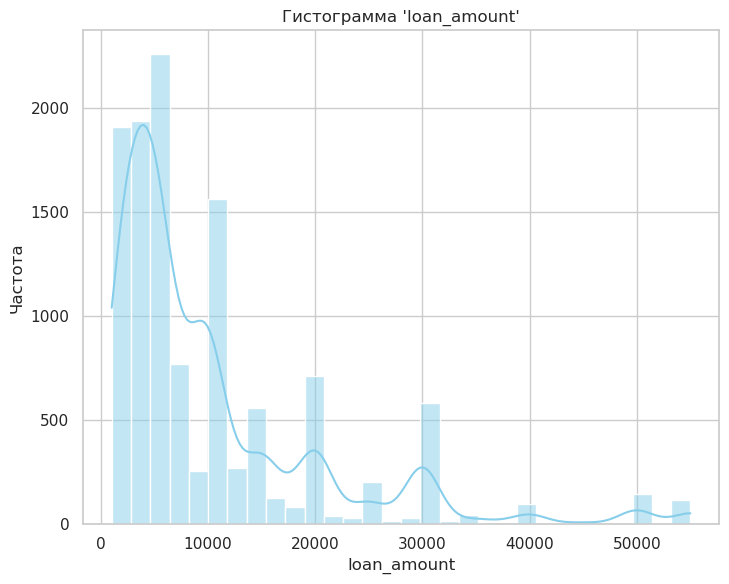

Построение для 'is_collateral'...


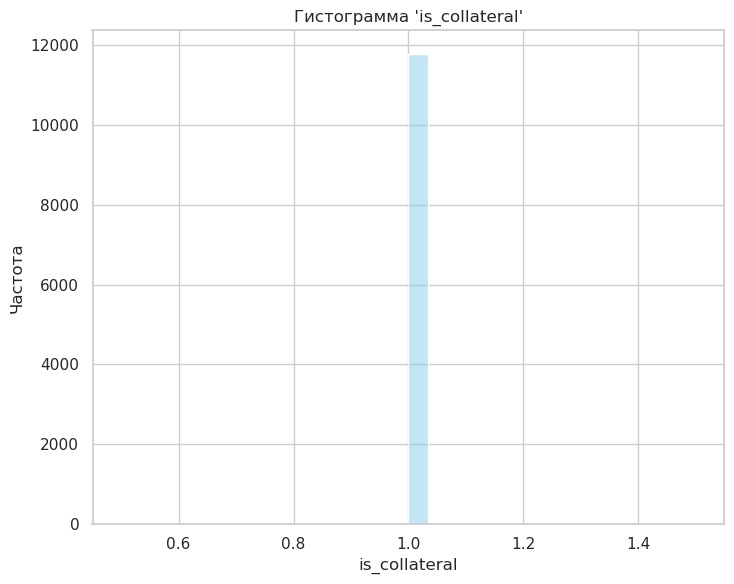

Построение для 'age'...


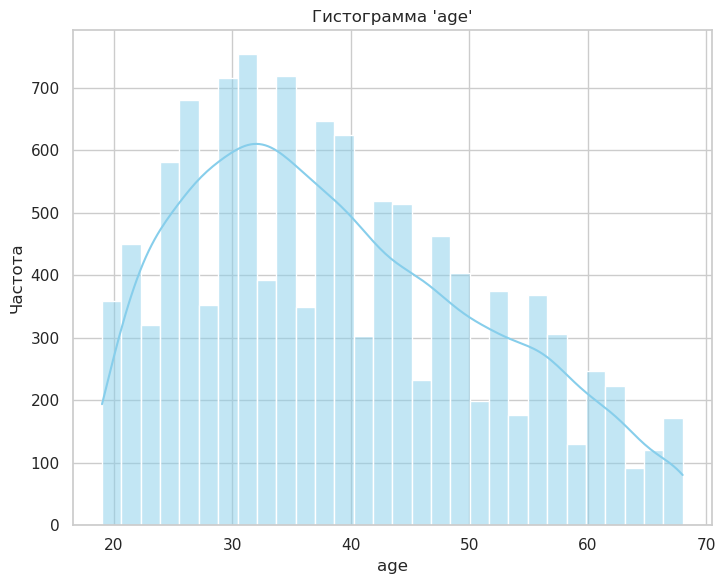

Построение для 'city_of_living_eq_registration'...


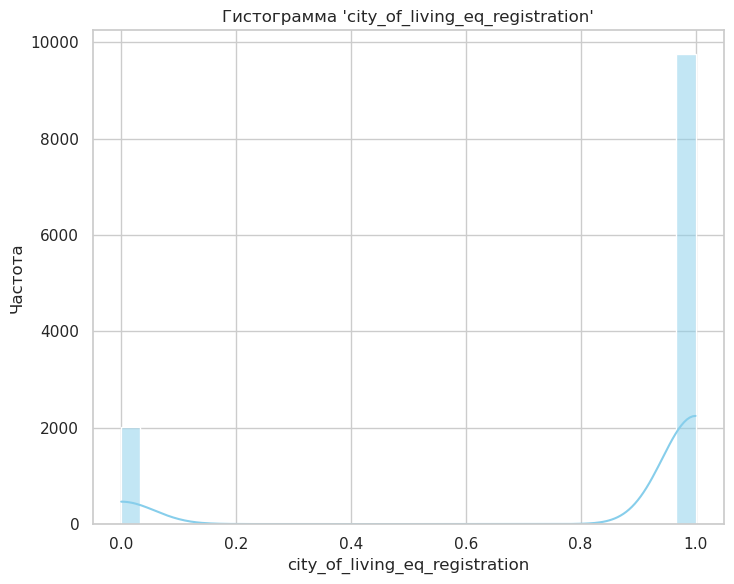

Построение для 'dependants'...


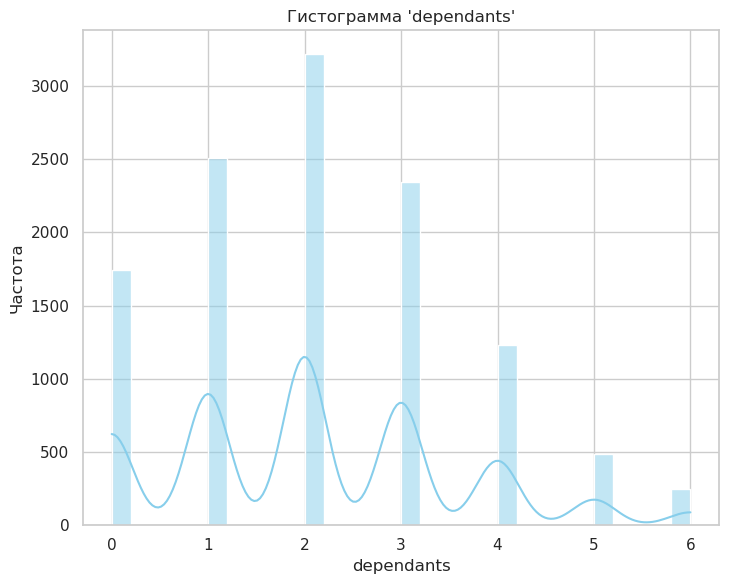

Построение для 'months_at_current_address'...


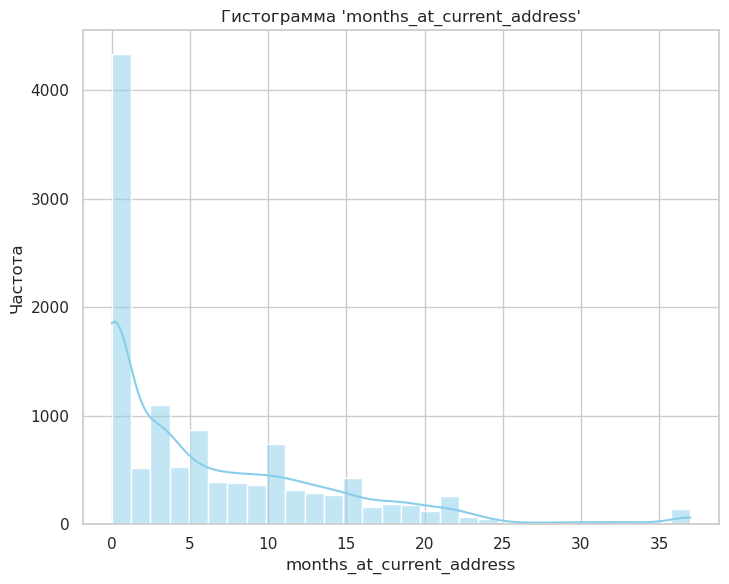

Построение для 'months_at_job'...


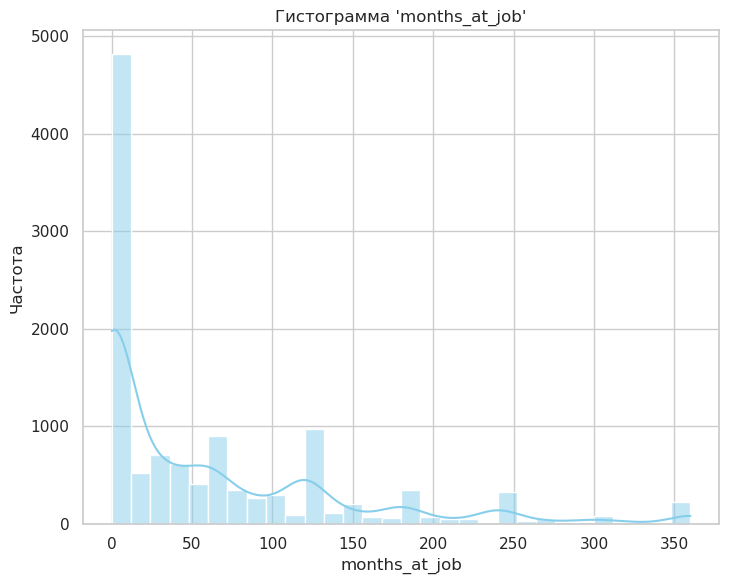

Построение для 'net_main_income'...


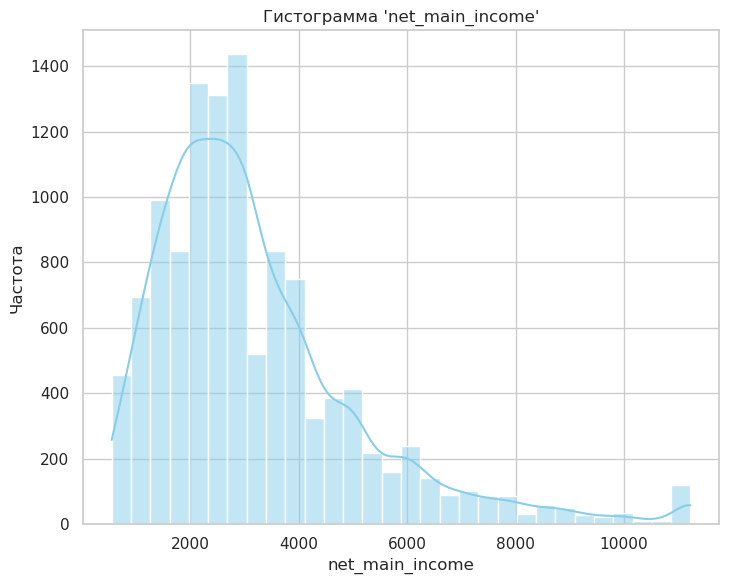

Построение для 'additional_income'...


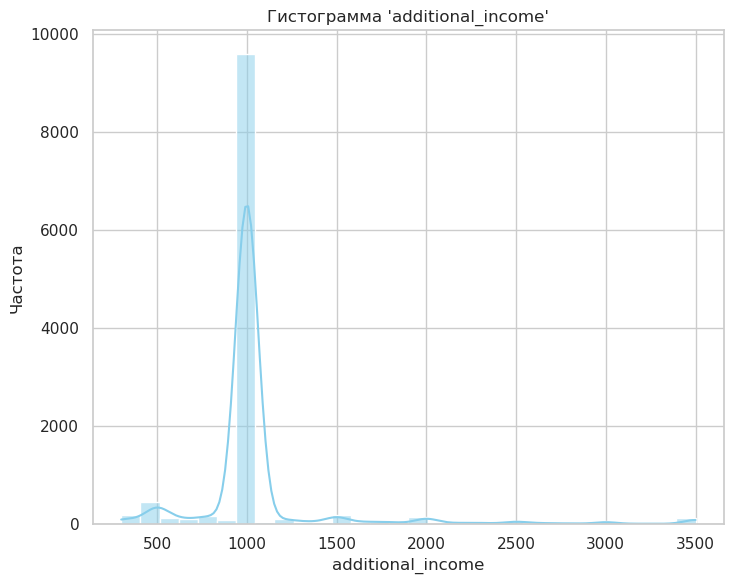

Построение для 'reported_expenses'...


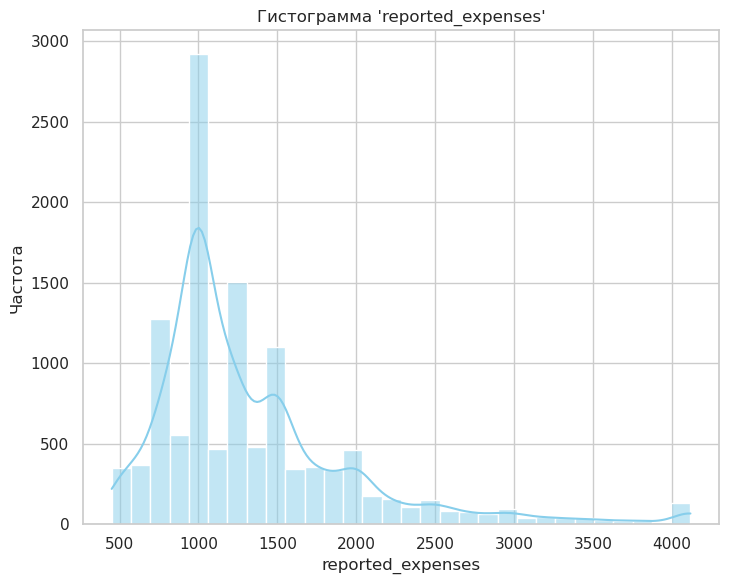

Построение для 'months_with_bank'...


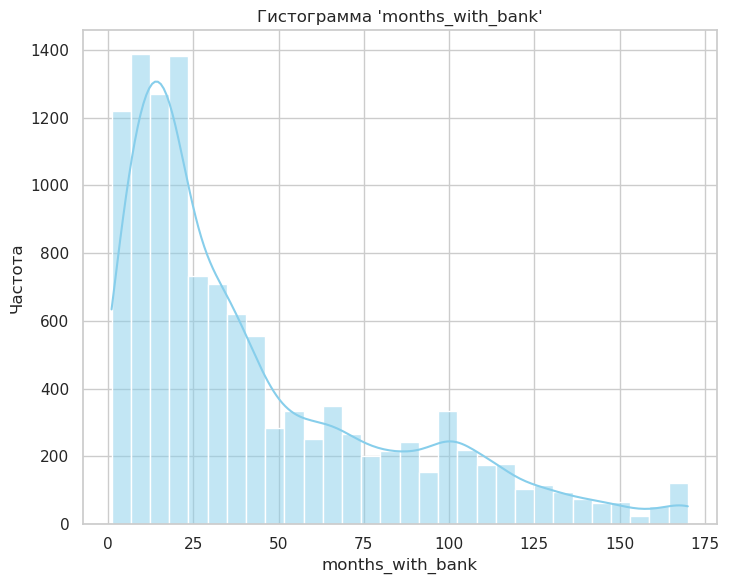

Построение для 'client_type'...


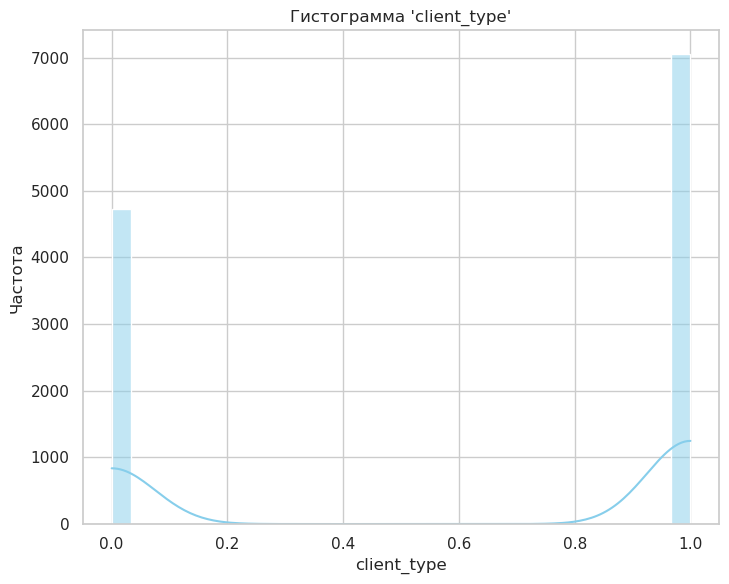

Построение для 'deposit'...


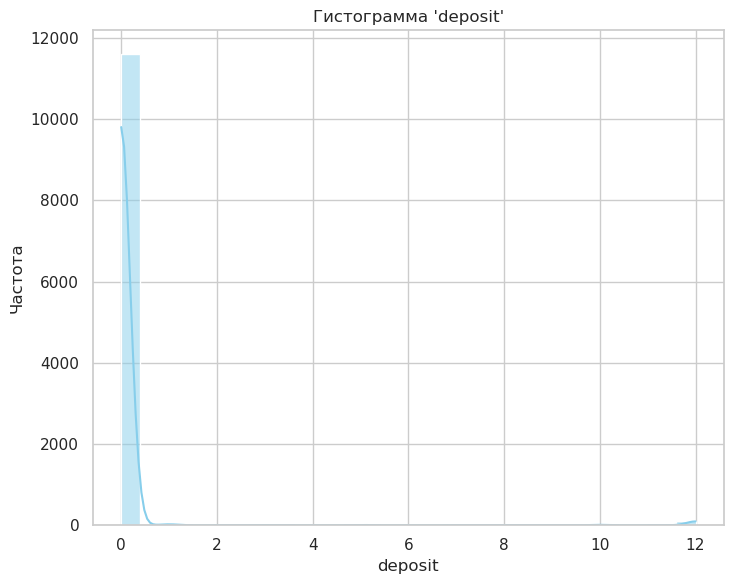

Построение для 'gb_90ever'...


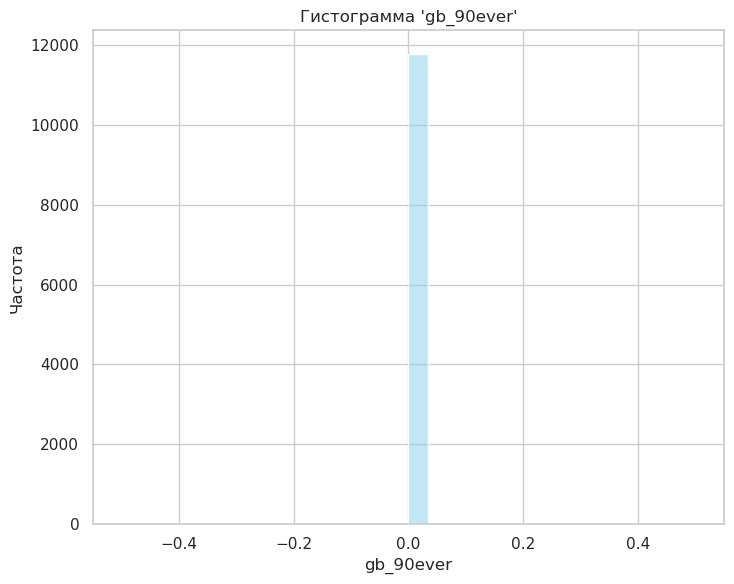

Построение для 'gb_cum_dlq_90'...


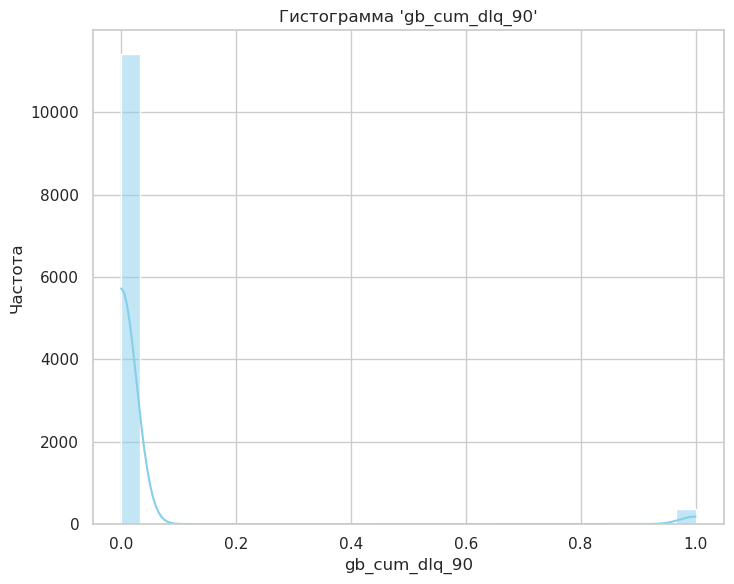

Построение для 'gb_60ever'...


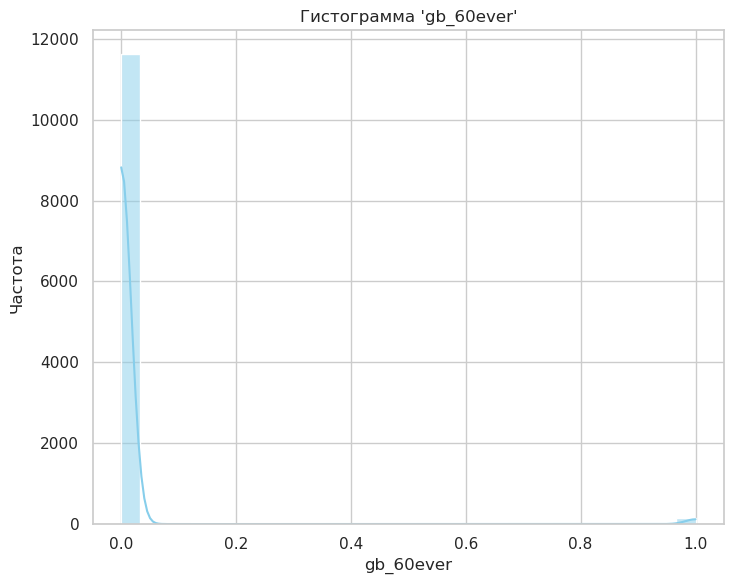

Построение для 'bki_number_of_loans'...


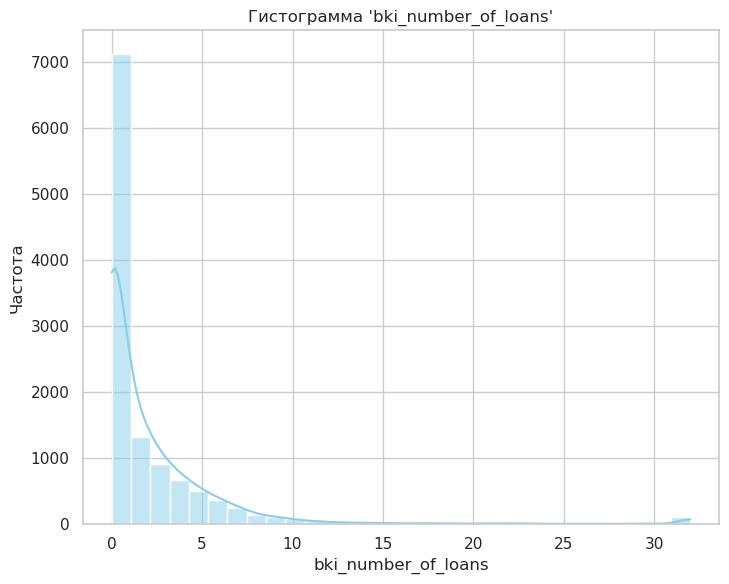

Построение для 'loan_month'...


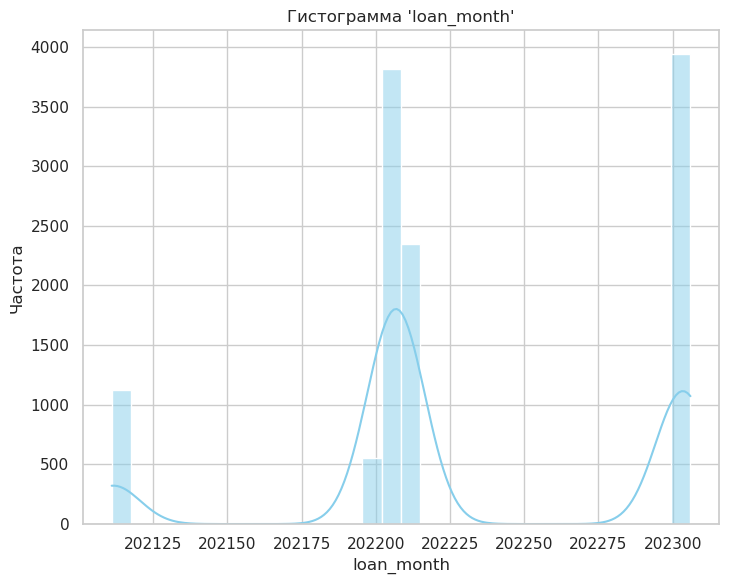

Построение для 'previous_loans_count'...


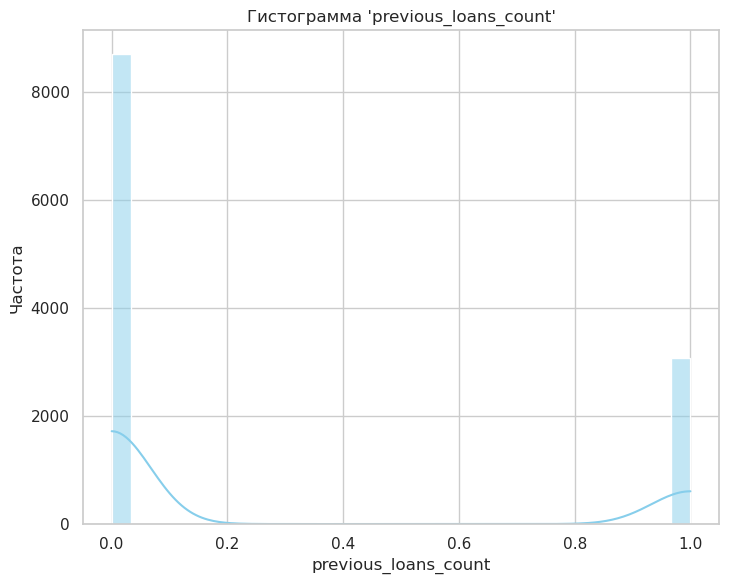

Построение для 'max_max_days_past_due'...


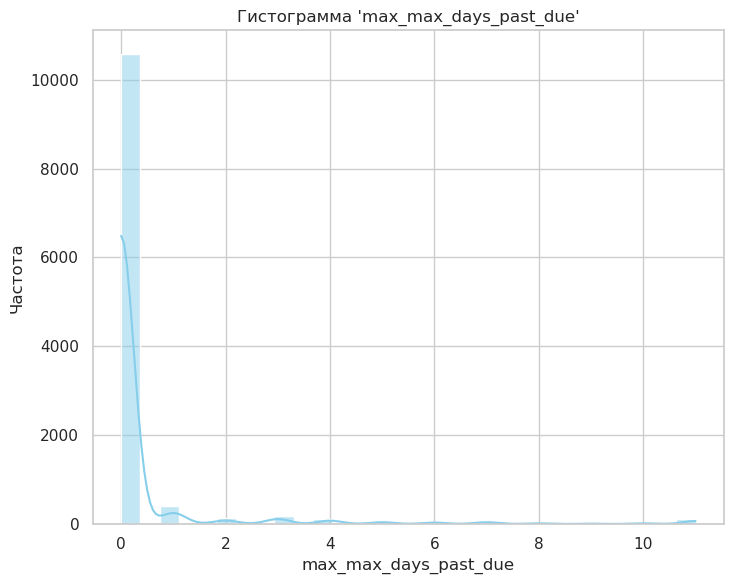

In [54]:
%matplotlib inline

print("Построение графиков для числовых столбцов...")
for col in numeric_columns:
    print(f"Построение для '{col}'...")
    plot_numeric(col)

# Итерация по категориальным столбцам и построение графиков

Построение графиков для категориальных столбцов...
Построение для 'salary_payment_in_bank_account'...


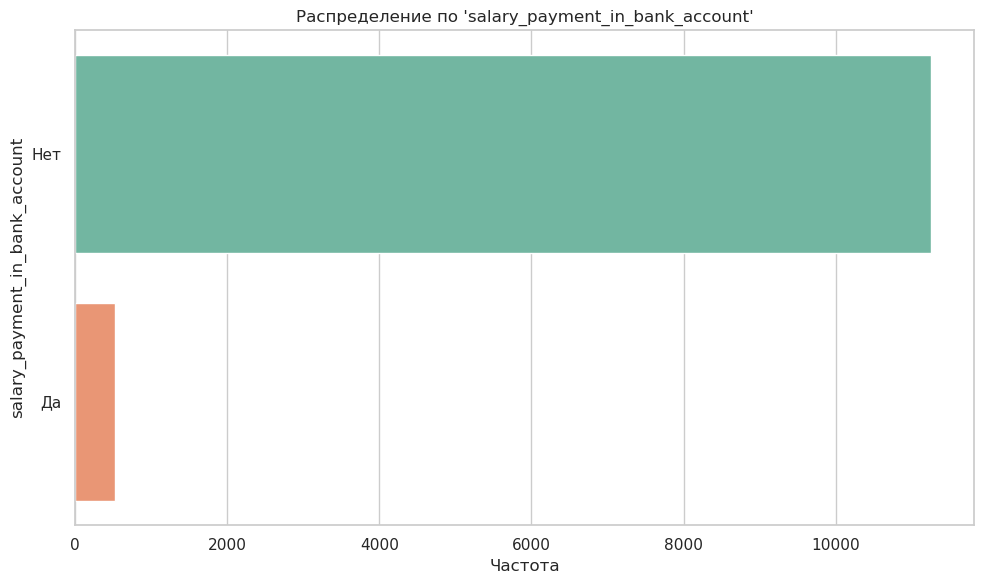

Построение для 'gender'...


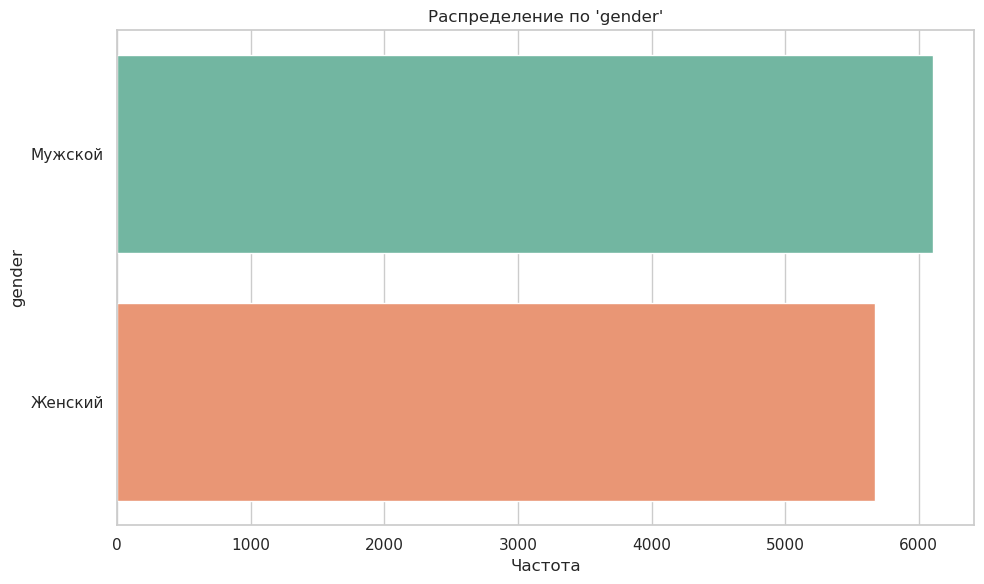

Построение для 'region_of_living'...


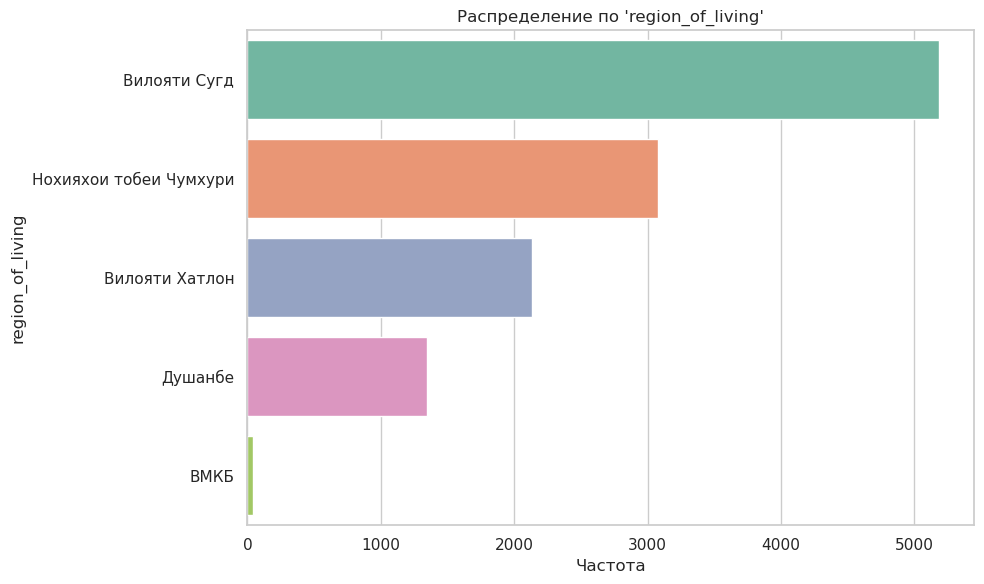

Построение для 'region_of_registration'...


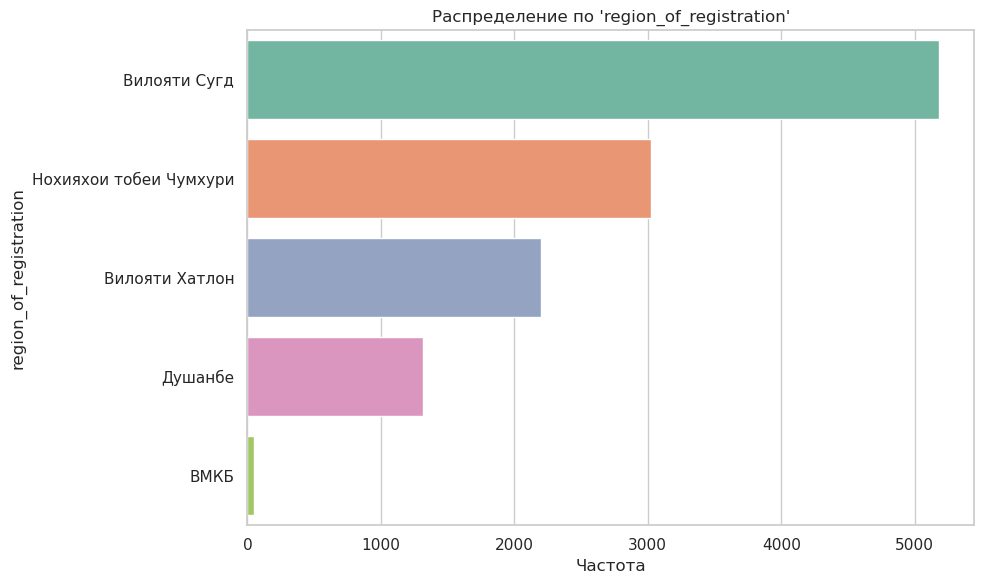

Построение для 'education'...


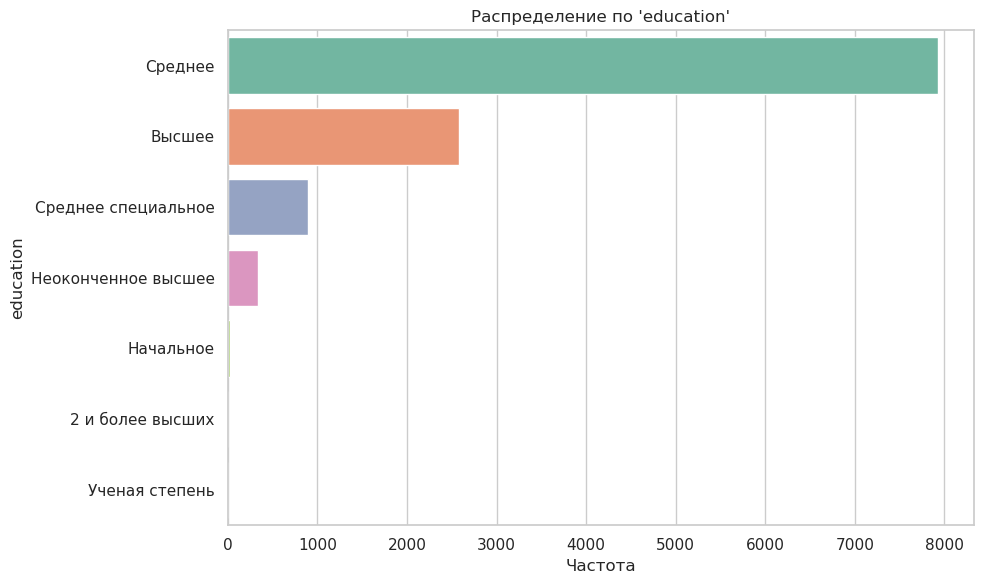

Построение для 'marital_status'...


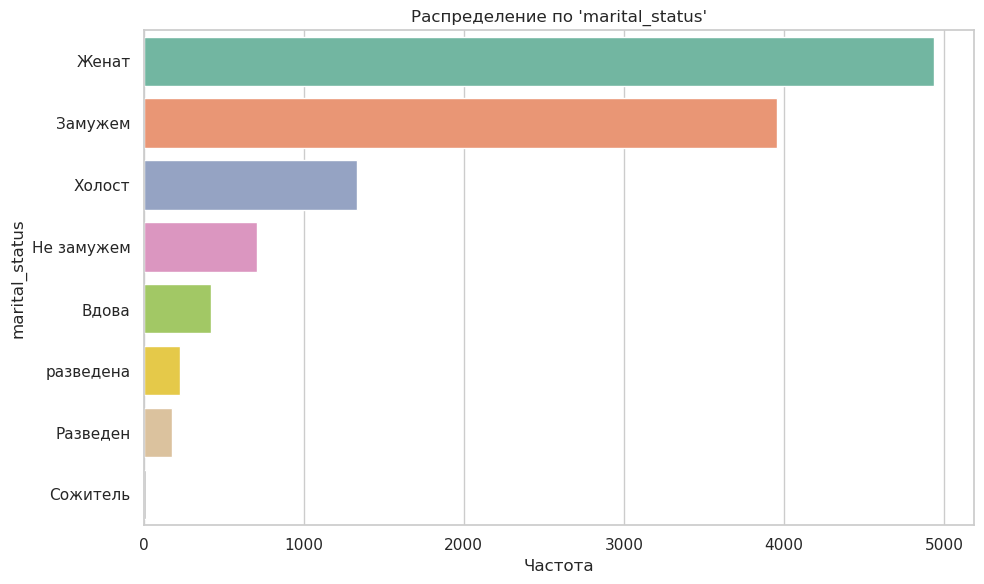

Построение для 'employment_type'...


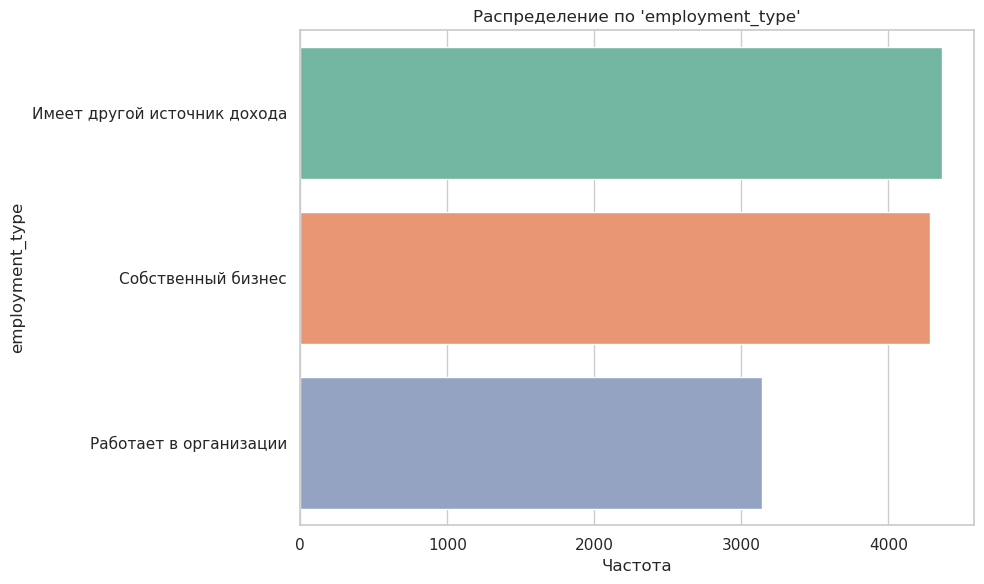

Построение для 'employment_segment'...


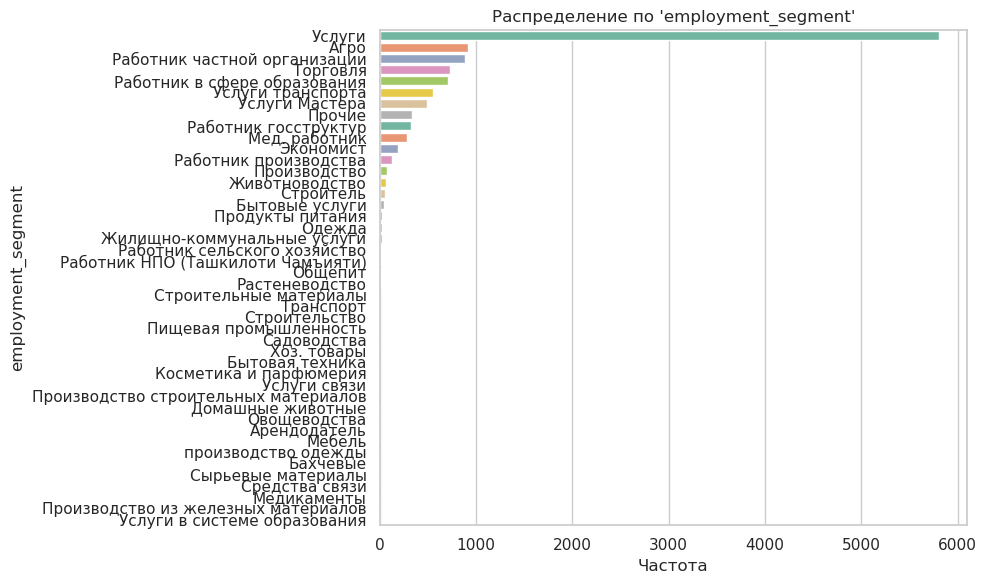

Построение для 'source_of_main_income'...


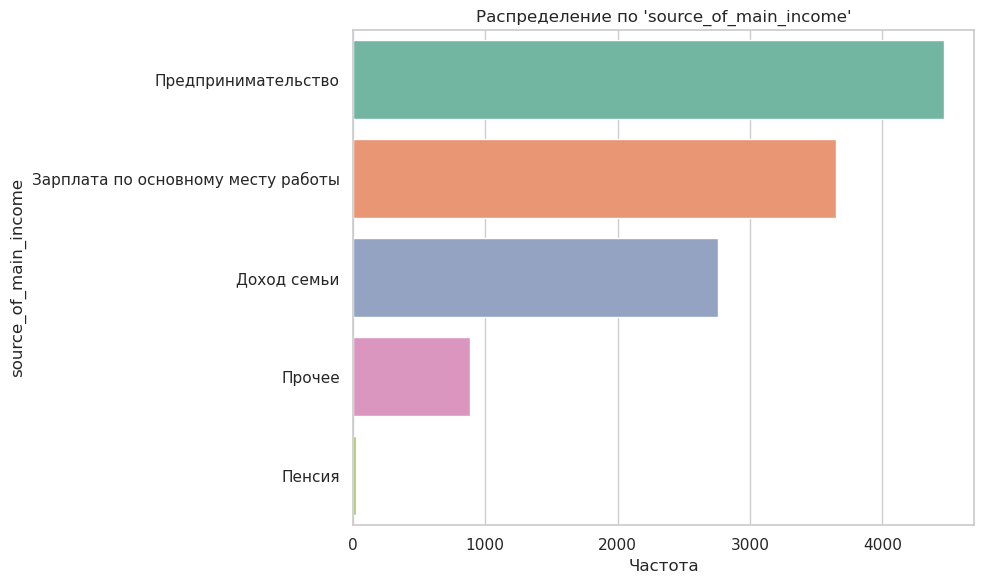

Построение для 'property_object'...


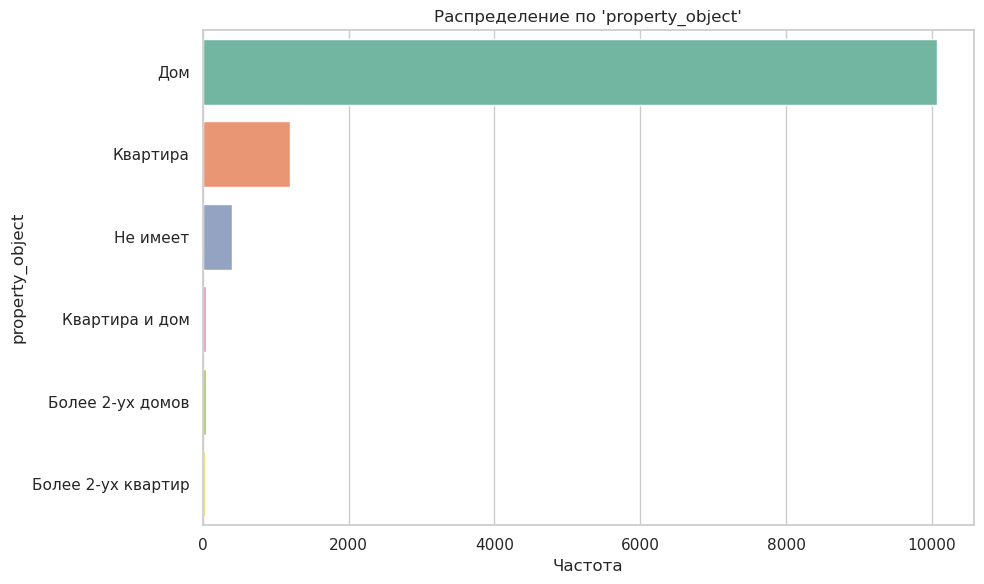

Построение для 'eskhata_online'...


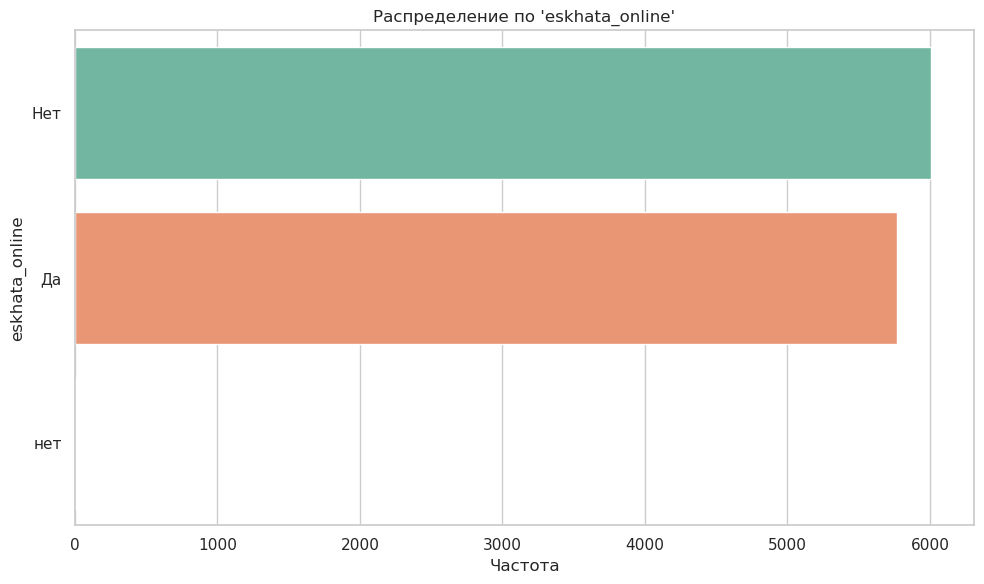

Построение для 'plastic_cards'...


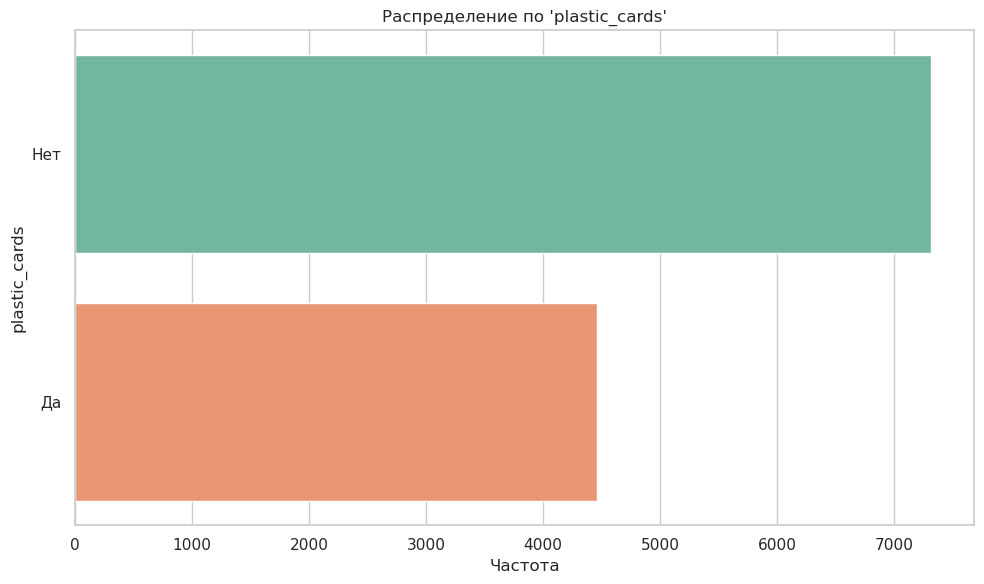

Построение для 'bki_rating'...


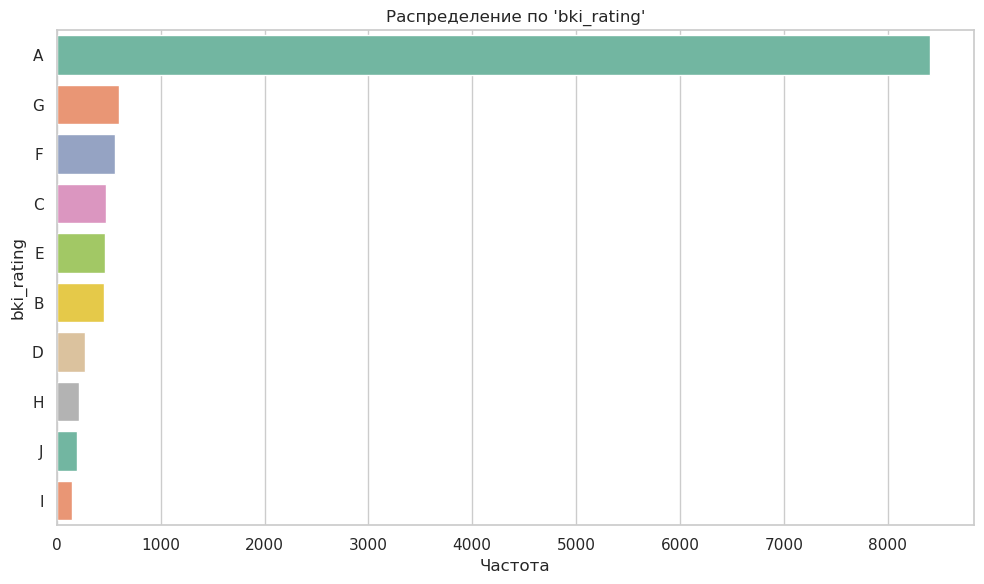

In [55]:
print("Построение графиков для категориальных столбцов...")
for col in categorical_columns:
    print(f"Построение для '{col}'...")
    plot_categorical(col)

# Итерация по временным столбцам и построение графиков

In [56]:
print("Построение графиков для временных столбцов...")
for col in datetime_columns:
    print(f"Построение для '{col}'...")
    plot_datetime(col)

print("Все графики построены.")


Построение графиков для временных столбцов...
Все графики построены.


# Сохранение графиков

In [57]:
# Создаём новый Excel-файл
workbook = xlsxwriter.Workbook('Графики.xlsx')

# Создаём листы для каждого типа столбцов
worksheet_numeric = workbook.add_worksheet('Числовые')
worksheet_categorical = workbook.add_worksheet('Категориальные')
worksheet_datetime = workbook.add_worksheet('Временные')

# Функция для вставки изображений в лист
def insert_images(worksheet, folder, columns, start_row=0, start_col=0):
    row = start_row
    col = start_col
    for column in columns:
        image_path = f'plots/{folder}/{column}.png'
        if os.path.exists(image_path):
            worksheet.insert_image(row, col, image_path, {'x_scale': 0.5, 'y_scale': 0.5})
            row += 20  # Переходим на следующую строку для следующего изображения
        else:
            print(f"Изображение для столбца '{column}' не найдено.")

# Вставляем графики в соответствующие листы
print("Вставка графиков в Excel-файл...")

insert_images(worksheet_numeric, 'numeric', numeric_columns)
insert_images(worksheet_categorical, 'categorical', categorical_columns)
insert_images(worksheet_datetime, 'datetime', datetime_columns)

# Закрываем Excel-файл
workbook.close()

print("Графики успешно вставлены в файл 'Графики.xlsx'.")


Вставка графиков в Excel-файл...
Изображение для столбца 'loan_amount' не найдено.
Изображение для столбца 'is_collateral' не найдено.
Изображение для столбца 'age' не найдено.
Изображение для столбца 'city_of_living_eq_registration' не найдено.
Изображение для столбца 'dependants' не найдено.
Изображение для столбца 'months_at_current_address' не найдено.
Изображение для столбца 'months_at_job' не найдено.
Изображение для столбца 'net_main_income' не найдено.
Изображение для столбца 'additional_income' не найдено.
Изображение для столбца 'reported_expenses' не найдено.
Изображение для столбца 'months_with_bank' не найдено.
Изображение для столбца 'client_type' не найдено.
Изображение для столбца 'deposit' не найдено.
Изображение для столбца 'gb_90ever' не найдено.
Изображение для столбца 'gb_cum_dlq_90' не найдено.
Изображение для столбца 'gb_60ever' не найдено.
Изображение для столбца 'bki_number_of_loans' не найдено.
Изображение для столбца 'loan_month' не найдено.
Изображение для с

# Группировка по loan_month и вычисление показателей просроченности

In [58]:
logging.info("Группировка по 'loan_month' и вычисление показателей просроченности.")
rep_gb_90ever_month = df_selected.groupby('loan_month').agg(
    count=('gb_90ever', 'count'),
    bad_num=('gb_90ever', 'sum'),
    bad_rate=('gb_90ever', 'mean')
).reset_index()

rep_gb_cum_dlq_90_month = df_selected.groupby('loan_month').agg(
    count=('gb_cum_dlq_90', 'count'),
    bad_num=('gb_cum_dlq_90', 'sum'),
    bad_rate=('gb_cum_dlq_90', 'mean')
).reset_index()

rep_gb_60ever_month = df_selected.groupby('loan_month').agg(
    count=('gb_60ever', 'count'),
    bad_num=('gb_60ever', 'sum'),
    bad_rate=('gb_60ever', 'mean')
).reset_index()


2024-12-08 09:06:59,363 - INFO - Группировка по 'loan_month' и вычисление показателей просроченности.


# Создание выборок по типу занятости

In [59]:
logging.info("Создание выборок по типу занятости.")
sample_empl = df_selected[
    (df_selected['employment_type'] == "Работает в организации") &
    (df_selected['employment_segment'].isin([
        "Мед. работник",
        "Работник в сфере образования",
        "Работник госструктур",
        "Работник НПО (Ташкилоти Чамъияти)",
        "Работник производства",
        "Работник сельского хозяйство",
        "Работник частной организации",
        "Строитель",
        "Экономист"
    ]))
].copy()

sample_bus = df_selected[
    (df_selected['employment_type'] == "Собственный бизнес") &
    (df_selected['employment_segment'].isin([
        "Агро",
        "Производство",
        "Торговля",
        "Услуги",
        "Услуги Мастера",
        "Услуги транспорта"
    ]))
].copy()

sample_other = df_selected[
    (df_selected['employment_type'] == "Имеет другой источник дохода") &
    (df_selected['employment_segment'].isna())
].copy()

2024-12-08 09:06:59,388 - INFO - Создание выборок по типу занятости.


In [60]:
logging.info("Вывод размеров выборок.")
print(f"\nРазмер выборки для работников: {sample_empl.shape[0]}")
print(f"Размер выборки для бизнесменов: {sample_bus.shape[0]}")
print(f"Размер выборки для других источников дохода: {sample_other.shape[0]}")

2024-12-08 09:06:59,410 - INFO - Вывод размеров выборок.



Размер выборки для работников: 51541
Размер выборки для бизнесменов: 80840
Размер выборки для других источников дохода: 0


# Создание выборки для анализа

In [61]:
# Пример выбора выборки для анализа
sample = sample_empl.copy()
# sample = sample_bus.copy()
# sample = sample_other.copy()

logging.info("Структура выбранной выборки:")
print(sample.info())

2024-12-08 09:06:59,417 - INFO - Структура выбранной выборки:


<class 'pandas.core.frame.DataFrame'>
Index: 51541 entries, 8 to 235696
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   loan_amount                     51541 non-null  float64 
 1   is_collateral                   51541 non-null  float64 
 2   salary_payment_in_bank_account  51541 non-null  category
 3   age                             51541 non-null  float64 
 4   gender                          51541 non-null  category
 5   region_of_living                51541 non-null  category
 6   region_of_registration          51541 non-null  category
 7   city_of_living_eq_registration  51541 non-null  float64 
 8   education                       51541 non-null  category
 9   marital_status                  51541 non-null  category
 10  dependants                      51541 non-null  float64 
 11  months_at_current_address       51541 non-null  float64 
 12  employment_type       

# Определение целевой переменной

In [62]:
# Создание переменной gb
logging.info("Создание целевой переменной 'gb'.")
sample.loc[:, 'gb'] = sample['gb_60ever']\

# sample.loc[:, 'gb'] = sample['gb_cum_dlq_90']

2024-12-08 09:06:59,427 - INFO - Создание целевой переменной 'gb'.


# Семплирование
## Создание выборок для Train и Test

In [63]:
# Выборка для обучения модели
dev = sample[(sample['loan_month'] >= 202110) & (sample['loan_month'] < 202210)].drop(columns=['loan_month']).copy()

# Выборка для тестирования модели на временную устойчивость
oot = sample[(sample['loan_month'] >= 202210) & (sample['loan_month'] < 202303)].copy()

# Выборка для кросс-валидации внутри обучающей выборки
oot2 = sample[(sample['loan_month'] >= 202207) & (sample['loan_month'] < 202210)].copy()

# Выборка для финального обучения модели
dev_final = sample[(sample['loan_month'] >= 202110) & (sample['loan_month'] < 202302)].drop(columns=['loan_month']).copy()

In [64]:
# Изучение распределений
logging.info("Изучение распределений в выборках.")
print("\nРаспределение в Development Sample:")
print(dev[['gb']].agg(['count', 'sum']))
print(dev[['gb']].agg(['count', 'sum']) / len(dev))

print("\nРаспределение в Out-of-time Sample:")
print(oot[['gb']].agg(['count', 'sum']))
print(oot[['gb']].agg(['count', 'sum']) / len(oot))

print("\nРаспределение в Out-of-time 2 Sample:")
print(oot2[['gb']].agg(['count', 'sum']))
print(oot2[['gb']].agg(['count', 'sum']) / len(oot2))

print("\nРаспределение в Development Final Sample:")
print(dev_final[['gb']].agg(['count', 'sum']))
print(dev_final[['gb']].agg(['count', 'sum']) / len(dev_final))

2024-12-08 09:06:59,455 - INFO - Изучение распределений в выборках.



Распределение в Development Sample:
            gb
count  27831.0
sum      599.0
             gb
count  1.000000
sum    0.021523

Распределение в Out-of-time Sample:
            gb
count  12429.0
sum       80.0
             gb
count  1.000000
sum    0.006437

Распределение в Out-of-time 2 Sample:
           gb
count  9355.0
sum     139.0
             gb
count  1.000000
sum    0.014858

Распределение в Development Final Sample:
            gb
count  37633.0
sum      669.0
             gb
count  1.000000
sum    0.017777


In [65]:
# Вывод количества строк в каждой выборке
logging.info("Вывод количества строк в каждой выборке.")
print(f"\nКоличество строк в Development Sample: {dev.shape[0]}")
print(f"Количество строк в Out-of-time Sample: {oot.shape[0]}")
print(f"Количество строк в Out-of-time 2 Sample: {oot2.shape[0]}")
print(f"Количество строк в Development Final Sample: {dev_final.shape[0]}")


2024-12-08 09:06:59,471 - INFO - Вывод количества строк в каждой выборке.



Количество строк в Development Sample: 27831
Количество строк в Out-of-time Sample: 12429
Количество строк в Out-of-time 2 Sample: 9355
Количество строк в Development Final Sample: 37633


# MACHINE LEARNING

In [66]:
import pandas as pd
import numpy as np
import scorecardpy as sc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import json
import statsmodels.api as sm
import joblib



# Расчет Information Value (IV)

In [67]:
logging.info("Расчет Information Value (IV) для всех переменных в dev_final.")
iv_values_final = sc.iv(dt=dev_final, y='gb')


2024-12-08 09:06:59,787 - INFO - Расчет Information Value (IV) для всех переменных в dev_final.


In [68]:
# Просмотр структуры и первых строк DataFrame iv_values_final
print("Структура iv_values_final:")
print(iv_values_final.columns)

print("\nПервые 5 строк iv_values_final:")
print(iv_values_final.head())


Структура iv_values_final:
Index(['variable', 'info_value'], dtype='object')

Первые 5 строк iv_values_final:
             variable  info_value
7             deposit    8.653554
15  additional_income    7.633114
8         loan_amount    5.808183
22      months_at_job    4.837030
2   reported_expenses    4.751137


# Отбор переменных на основе IV

In [69]:
logging.info("Отбор переменных на основе IV >= 0.01.")
selected_vars_iv = iv_values_final[
    iv_values_final['info_value'] >= 0.01
]['variable'].tolist()

logging.info(f"Переменные с info_value >= 0.01: {selected_vars_iv}")


2024-12-08 09:07:02,251 - INFO - Отбор переменных на основе IV >= 0.01.
2024-12-08 09:07:02,252 - INFO - Переменные с info_value >= 0.01: ['deposit', 'additional_income', 'loan_amount', 'months_at_job', 'reported_expenses', 'max_max_days_past_due', 'source_of_main_income', 'property_object', 'bki_number_of_loans', 'education', 'net_main_income', 'months_at_current_address', 'gb_60ever', 'bki_rating', 'marital_status', 'employment_segment', 'gb_cum_dlq_90', 'months_with_bank', 'region_of_living', 'dependants', 'salary_payment_in_bank_account', 'region_of_registration', 'previous_loans_count', 'age', 'city_of_living_eq_registration', 'plastic_cards', 'client_type', 'eskhata_online']


# Вычисление доли пропусков для отобранных переменных

In [70]:
logging.info("Расчет доли пропусков для отобранных переменных.")
# Рассчитываем долю пропусков для отобранных переменных
missing_rates = dev_final[selected_vars_iv].isnull().mean().reset_index()
missing_rates.columns = ['variable', 'missing']


2024-12-08 09:07:02,256 - INFO - Расчет доли пропусков для отобранных переменных.


In [71]:
# Просмотр первых строк
logging.info("Структура missing_rates:")
display(missing_rates.columns)

logging.info("missing_rates:")
display(missing_rates.sort_values(by='missing', ascending=False))


2024-12-08 09:07:02,263 - INFO - Структура missing_rates:


Index(['variable', 'missing'], dtype='object')

2024-12-08 09:07:02,264 - INFO - missing_rates:


,variable,missing
0,deposit,0.0
1,additional_income,0.0
26,client_type,0.0
25,plastic_cards,0.0
24,city_of_living_eq_registration,0.0
23,age,0.0
22,previous_loans_count,0.0
21,region_of_registration,0.0
20,salary_payment_in_bank_account,0.0
19,dependants,0.0


# Объединение IV и missing_rates

In [72]:
# Объединяем IV и по долю пропусков
iv_with_missing = iv_values_final.merge(missing_rates, on='variable')

# Просмотр первых строк
logging.info("Структура iv_with_missing:")
display(iv_with_missing.columns)

logging.info("iv_with_missing:")
display(iv_with_missing.head())


2024-12-08 09:07:02,272 - INFO - Структура iv_with_missing:


Index(['variable', 'info_value', 'missing'], dtype='object')

2024-12-08 09:07:02,273 - INFO - iv_with_missing:


,variable,info_value,missing
0,deposit,8.653554,0.0
1,additional_income,7.633114,0.0
2,loan_amount,5.808183,0.0
3,months_at_job,4.837030,0.0
4,reported_expenses,4.751137,0.0


# Фильтрация переменных по IV и пропускам

In [73]:
logging.info("Фильтрация переменных по info_value >= 0.01 и missing <= 0.95.")
# Отбор переменных с info_value >= 0.01 и пропусками <= 0.95
filtered_iv = iv_with_missing[
    (iv_with_missing['info_value'] >= 0.01) &
    (iv_with_missing['missing'] <= 0.95)
]

# Извлечение списка переменных
selected_vars_final = filtered_iv['variable'].tolist()

# Исключение определенных переменных
vars_to_remove = ["gb_90ever", "gb_60ever", "gb_cum_dlq_90", "current_exposure"]
selected_vars_final = [var for var in selected_vars_final if var not in vars_to_remove]

logging.info(f"Отобранные переменные после фильтрации по IV и пропускам: {selected_vars_final}")


2024-12-08 09:07:02,280 - INFO - Фильтрация переменных по info_value >= 0.01 и missing <= 0.95.
2024-12-08 09:07:02,281 - INFO - Отобранные переменные после фильтрации по IV и пропускам: ['deposit', 'additional_income', 'loan_amount', 'months_at_job', 'reported_expenses', 'max_max_days_past_due', 'source_of_main_income', 'property_object', 'bki_number_of_loans', 'education', 'net_main_income', 'months_at_current_address', 'bki_rating', 'marital_status', 'employment_segment', 'months_with_bank', 'region_of_living', 'dependants', 'salary_payment_in_bank_account', 'region_of_registration', 'previous_loans_count', 'age', 'city_of_living_eq_registration', 'plastic_cards', 'client_type', 'eskhata_online']


# Создание dev_final_sel

In [74]:
logging.info("Создание dev_final_sel с отобранными переменными.")
dev_final_sel = dev_final[selected_vars_final + ['gb']].copy()

logging.info(f"Количество строк в dev_final_sel: {dev_final_sel.shape[0]}")
logging.info(f"Количество столбцов в dev_final_sel: {dev_final_sel.shape[1]}")


2024-12-08 09:07:02,289 - INFO - Создание dev_final_sel с отобранными переменными.
2024-12-08 09:07:02,292 - INFO - Количество строк в dev_final_sel: 37633
2024-12-08 09:07:02,292 - INFO - Количество столбцов в dev_final_sel: 27


# Определение правил биннинга

In [75]:
logging.info("Определение правил биннинга для переменных.")

breaks = {
    'education': [
        "Высшее", "Ученая степень", "2 и более высших",
        "Среднее", "Начальное",
        "Среднее специальное",
        "Неоконченное высшее"
    ],
    'region_of_living': [
        "Вилояти Сугд", 
        "Вилояти Хатлон", "ВМКБ",
        "Душанбе", 
        "Нохияхои тобеи Чумхури"
    ],
    'marital_status': [
        "Женат", "Сожитель",
        "Замужем", "Вдова", "Разведена",
        "Холост", 
        "Не замужем", "Разведен"
    ],
    'employment_segment': [
        "Мед. работник", "Работник в сфере образования", "Экономист", "Работник НПО (Ташкилоти Чамъияти)",
        "Работник госструктур", "Строитель",
        "Работник производства", "Работник сельского хозяйство",
        "Работник частной организации"
    ],
    'source_of_main_income': [
        "Доход семьи",
        "Зарплата по основному месту работы",
        "Предпринимательство",
        "Пенсия", "Алименты", "Прочее", "missing"
    ],
    'months_at_job': [31, 61, 145, 277],
    'months_with_bank': [10, 25, 79],
    'net_main_income': ["missing", "1600", 3400]
}


2024-12-08 09:07:02,296 - INFO - Определение правил биннинга для переменных.


# Обработка пропусков в категориальных переменных: добавление категории 'missing'

In [76]:
logging.info("Обработка пропусков в категориальных переменных.")
for var in selected_vars_final:
    if dev_final_sel[var].dtype == 'object' or pd.api.types.is_categorical_dtype(dev_final_sel[var]):
        if dev_final_sel[var].isnull().any():
            dev_final_sel[var] = dev_final_sel[var].astype('category')
            if 'missing' not in dev_final_sel[var].cat.categories:
                dev_final_sel[var].cat.add_categories('missing', inplace=True)
            dev_final_sel[var].fillna('missing', inplace=True)

logging.info("Применение биннинга и расчет WOE на dev_final_sel.")


2024-12-08 09:07:02,301 - INFO - Обработка пропусков в категориальных переменных.
2024-12-08 09:07:02,303 - INFO - Применение биннинга и расчет WOE на dev_final_sel.


In [77]:
dev_final_sel.head()

,deposit,additional_income,loan_amount,months_at_job,reported_expenses,max_max_days_past_due,source_of_main_income,property_object,bki_number_of_loans,education,net_main_income,months_at_current_address,bki_rating,marital_status,employment_segment,months_with_bank,region_of_living,dependants,salary_payment_in_bank_account,region_of_registration,previous_loans_count,age,city_of_living_eq_registration,plastic_cards,client_type,eskhata_online,gb
8,0.0,1000.0,50000.0,61.0,1696.0,0.0,Зарплата по основному месту работы,Квартира,2.0,Высшее,3523.0,5.0,A,Женат,Экономист,103.0,Душанбе,2.0,Да,Душанбе,0.0,30.0,0.0,Да,1.0,Да,0.0
11,0.0,1000.0,3000.0,348.0,1200.0,0.0,Зарплата по основному месту работы,Дом,3.0,Высшее,2522.0,14.0,B,Женат,Работник в сфере образования,76.0,Нохияхои тобеи Чумхури,0.0,Нет,Нохияхои тобеи Чумхури,0.0,50.0,1.0,Нет,1.0,Нет,0.0
13,0.0,1000.0,3500.0,300.0,500.0,0.0,Зарплата по основному месту работы,Дом,6.0,Среднее,614.0,5.0,C,Замужем,Мед. работник,90.0,Вилояти Хатлон,1.0,Нет,Вилояти Хатлон,0.0,47.0,1.0,Нет,1.0,Нет,0.0
15,0.0,1000.0,2000.0,156.0,800.0,0.0,Зарплата по основному месту работы,Дом,3.0,Высшее,1291.0,7.0,F,Женат,Работник госструктур,73.0,Вилояти Сугд,4.0,Нет,Вилояти Сугд,0.0,39.0,0.0,Нет,1.0,Нет,0.0
19,0.0,1000.0,8000.0,36.0,1151.0,0.0,Зарплата по основному месту работы,Дом,1.0,Высшее,1268.0,3.0,A,Разведен,Мед. работник,107.0,Вилояти Сугд,1.0,Да,Вилояти Сугд,0.0,28.0,1.0,Да,1.0,Да,0.0


In [78]:
# Закоментировал breaks_list чтобы использовать автоматический бининг
try:
    bins_final = sc.woebin(
        dt=dev_final_sel,
        y="gb",
        method="tree",
        # breaks_list=breaks,
        check_cate_num=False,
        count_distr_limit=0.05,
        bin_num_limit=5
    )
    logging.info("Биннинг и расчет WOE выполнены успешно.")
except Exception as e:
    logging.error(f"Ошибка при биннинге и расчете WOE: {e}")
    raise

[INFO] creating woe binning ...


2024-12-08 09:07:03,528 - ERROR - Ошибка при биннинге и расчете WOE: 'gb'


KeyError: 'gb'

# Разбиение данных на Train и Test

In [ ]:
logging.info("Разбиение данных на Train и Test (Out-of-sample).")
train, test = train_test_split(
    dev_final_sel,
    test_size=0.33,
    random_state=42,
    stratify=dev_final_sel['gb']
)

logging.info(f"Количество строк в Train: {train.shape[0]}")
logging.info(f"Количество строк в Test: {test.shape[0]}")


# Применение WOE кодирования к всем выборкам

In [ ]:
logging.info("Применение WOE кодирования ко всем выборкам.")
dev_woe = sc.woebin_ply(dev, bins_final)
oot_woe = sc.woebin_ply(oot, bins_final)
oot2_woe = sc.woebin_ply(oot2, bins_final)

train_woe = sc.woebin_ply(train, bins_final)
test_woe = sc.woebin_ply(test, bins_final)

# Для финального полного обучающего семпла
dev_final_woe = sc.woebin_ply(dev_final_sel, bins_final)

# Для всего семпла
sample_woe = sc.woebin_ply(sample, bins_final)

# Расчет Information Value для WOE-переменных

In [ ]:
logging.info("Расчет Information Value для WOE-переменных.")
iv_values_final_woe = sc.iv(dt=dev_final_woe, y='gb')

# Просмотр структуры и первых строк IV для WOE-переменных
print("Структура iv_values_final_woe:")
print(iv_values_final_woe.columns)

print("\niv_values_final_woe:")
print(iv_values_final_woe)

# Сохранение IV значений
iv_values_final_woe.to_excel("iv_values_woe.xlsx", index=False)

# Проверка корреляции между признаками

In [ ]:
selected_vars_final = 'gb	bki_rating_woe	region_of_living_woe	months_at_job_woe	previous_loans_count_woe	education_woe	salary_payment_in_bank_account_woe	source_of_main_income_woe	city_of_living_eq_registration_woe	bki_number_of_loans_woe	loan_amount_woe	age_woe	months_with_bank_woe	gender_woe	additional_income_woe	eskhata_online_woe	dependants_woe	employment_segment_woe	net_main_income_woe	client_type_woe	property_object_woe	region_of_registration_woe	plastic_cards_woe	marital_status_woe	reported_expenses_woe	deposit_woe	months_at_current_address_woe	max_max_days_past_due_woe'.split('	')

In [ ]:
logging.info("Расчет корреляционной матрицы.")
cor_matrix = dev_final_woe[selected_vars_final].corr()

# Сохранение корреляционной матрицы в Excel
cor_matrix.to_excel("employee_corr_matrix.xlsx")

# Визуализация корреляционной матрицы
logging.info("Визуализация корреляционной матрицы.")
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


# Пошаговый отбор переменных (Stepwise Selection)

In [ ]:
# Функция для пошагового отбора переменных на основе p-значений
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.05, 
                       verbose=True):
    """Пошаговый отбор переменных на основе p-значений."""
    included = list(initial_list)
    while True:
        changed=False
        # Добавление переменной
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            try:
                model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
                new_pval[new_column] = model.pvalues[new_column]
            except:
                new_pval[new_column] = 1
        if not new_pval.empty:
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print(f'Добавлена переменная {best_feature} с p-value {best_pval}')
        # Удаление переменной
        if len(included) > 0:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
            pvalues = model.pvalues.drop('const')
            worst_pval = pvalues.max()
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print(f'Удалена переменная {worst_feature} с p-value {worst_pval}')
        if not changed:
            break
    return included


# Разделение данных на признаки и целевую переменную

In [ ]:
logging.info("Разделение данных на признаки и целевую переменную.")
X_train = train_woe.drop(['gb'], axis=1)
y_train = train_woe['gb']

# Пошаговый отбор переменных на основе p-значений
logging.info("Пошаговый отбор переменных на основе p-значений.")
selected_features_stepwise = stepwise_selection(X_train, y_train)

logging.info(f"Отобранные переменные после пошагового отбора: {selected_features_stepwise}")

# Обучение модели с отобранными переменными

In [ ]:
logging.info("Обучение модели с отобранными переменными.")
X_train_selected = X_train[selected_features_stepwise]
model_selected = LogisticRegression(max_iter=1000)
model_selected.fit(X_train_selected, y_train)

In [ ]:
# Вывод коэффициентов модели
logging.info("Коэффициенты модели с отобранными переменными:")
coefficients_selected = pd.DataFrame({
    'Variable': selected_features_stepwise,
    'Coefficient': model_selected.coef_[0]
})
print(coefficients_selected)

# Подготовка данных для предсказания

In [ ]:
# Обучение и сохранение scaler и imputer
logging.info("Обучение SimpleImputer и StandardScaler.")
# Обучение импьютера на тренировочных данных
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_selected)

# Обучение скейлера на импутиванных данных
X_train_imputed = imputer.transform(X_train_selected)
scaler = StandardScaler()
scaler.fit(X_train_imputed)

# Сохранение scaler и imputer
logging.info("Сохранение scaler и imputer на диск.")
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(imputer, 'imputer.joblib')

In [ ]:
# Загрузка scaler и imputer
# scaler = joblib.load('scaler.joblib')
# imputer = joblib.load('imputer.joblib')

# Функция для подготовки данных перед предсказанием
def prepare_data(df, bins, selected_features, scaler, imputer):
    """
    Применяет WOE кодирование, обработку пропусков и масштабирование к данным.
    """
    # Применение WOE кодирования
    df_woe = sc.woebin_ply(df, bins)
    
    # Выбор отобранных признаков
    X = df_woe[selected_features]
    
    # Обработка пропусков
    X_imputed = imputer.transform(X)
    
    # Масштабирование
    X_scaled = scaler.transform(X_imputed)
    
    return X_scaled

# Применение функции подготовки данных к различным выборкам

In [ ]:
logging.info("Подготовка данных для предсказания на различных подвыборках.")

X_train_selected_scaled = prepare_data(train, bins_final, selected_features_stepwise, scaler, imputer)
y_train_selected = train['gb']

X_test_selected_scaled = prepare_data(test, bins_final, selected_features_stepwise, scaler, imputer)
y_test_selected = test['gb']

X_oot_selected_scaled = prepare_data(oot, bins_final, selected_features_stepwise, scaler, imputer)
y_oot_selected = oot['gb']

X_oot2_selected_scaled = prepare_data(oot2, bins_final, selected_features_stepwise, scaler, imputer)
y_oot2_selected = oot2['gb']

X_dev_final_selected_scaled = prepare_data(dev_final, bins_final, selected_features_stepwise, scaler, imputer)
y_dev_final_selected = dev_final['gb']



# Предсказания и оценка модели

In [ ]:
# Функция для оценки модели
def evaluate_model(y_true, y_pred, y_pred_proba, dataset_name):
    """
    Выводит ROC-AUC, отчет по классификации и матрицу ошибок.
    """
    auc = roc_auc_score(y_true, y_pred_proba)
    logging.info(f"ROC-AUC на {dataset_name} выборке: {auc:.4f}")
    print(f"\nОтчёт по классификации на {dataset_name} выборке:")
    print(classification_report(y_true, y_pred))
    print(f"Матрица ошибок на {dataset_name} выборке:")
    print(confusion_matrix(y_true, y_pred))
    return auc

In [ ]:
# Предсказания на различных подвыборках
logging.info("Предсказания на тренировочной выборке.")
train_pred_proba = model_selected.predict_proba(X_train_selected_scaled)[:, 1]
train_pred = model_selected.predict(X_train_selected_scaled)

logging.info("Предсказания на тестовой выборке (out-of-sample).")
test_pred_proba = model_selected.predict_proba(X_test_selected_scaled)[:, 1]
test_pred = model_selected.predict(X_test_selected_scaled)

logging.info("Предсказания на out-of-time выборке.")
oot_pred_proba = model_selected.predict_proba(X_oot_selected_scaled)[:, 1]
oot_pred = model_selected.predict(X_oot_selected_scaled)

logging.info("Предсказания на out-of-time 2 выборке.")
oot2_pred_proba = model_selected.predict_proba(X_oot2_selected_scaled)[:, 1]
oot2_pred = model_selected.predict(X_oot2_selected_scaled)

logging.info("Предсказания на Development Final выборке.")
dev_final_pred_proba = model_selected.predict_proba(X_dev_final_selected_scaled)[:, 1]
dev_final_pred = model_selected.predict(X_dev_final_selected_scaled)


# Оценка модели на различных подвыборках

In [ ]:
auc_train = evaluate_model(y_train_selected, train_pred, train_pred_proba, "тренировочной")
auc_test = evaluate_model(y_test_selected, test_pred, test_pred_proba, "тестовой (out-of-sample)")
auc_oot = evaluate_model(y_oot_selected, oot_pred, oot_pred_proba, "out-of-time")
auc_oot2 = evaluate_model(y_oot2_selected, oot2_pred, oot2_pred_proba, "out-of-time 2")
auc_dev_final = evaluate_model(y_dev_final_selected, dev_final_pred, dev_final_pred_proba, "Development Final")


# Визуализация ROC-кривых

In [ ]:
# Определение функции для построения ROC-кривой на заданном подграфике
def plot_roc(ax, y_true, y_proba, label, color):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=color, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=1, label='Случайная модель (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)', fontsize=12)
    ax.set_ylabel('True Positive Rate (TPR)', fontsize=12)
    ax.set_title(f'ROC-кривая для {label}', fontsize=14)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(True)

In [ ]:
# Список данных для ROC-кривых
roc_data = [
    (y_train_selected, train_pred_proba, 'Тренировочная'),
    (y_test_selected, test_pred_proba, 'Тестовая (Out-of-sample)'),
    (y_oot_selected, oot_pred_proba, 'Out-of-time'),
    (y_oot2_selected, oot2_pred_proba, 'Out-of-time 2'),
    (y_dev_final_selected, dev_final_pred_proba, 'Development Final')
]



In [ ]:
# Настройки Seaborn для улучшения внешнего вида графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 10)  # Общий размер фигуры

# Создание сетки подграфиков
num_plots = len(roc_data)
cols = 3  # Количество столбцов в сетке
rows = (num_plots + cols - 1) // cols  # Вычисление необходимого количества строк

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axes = axes.flatten()  # Преобразование массива подграфиков в одномерный список

# Получение цветовой палитры с достаточным количеством уникальных цветов
palette = sns.color_palette("hsv", num_plots)

# Итерация по данным и построение ROC-кривых
for i, (data, color) in enumerate(zip(roc_data, palette)):
    y_true, y_proba, label = data
    ax = axes[i]
    plot_roc(ax, y_true, y_proba, label, color)

plt.tight_layout()
plt.show()


In [ ]:
# pip install -r requirements.txt

In [ ]:
# pip list
